In [1]:
import pandas as pd

# Read the text file with space as the delimiter
data = pd.read_csv("C:/Users/user/Downloads/secom (1)/secom.data", delim_whitespace=True, header=None)

# Save to CSV
data.to_csv('secom_new.csv', index=False, header=True)

print("Conversion complete.")

C:\Users\user\AppData\Local\Temp\ipykernel_8636\7126076.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("C:/Users/user/Downloads/secom (1)/secom.data", delim_whitespace=True, header=None)


Conversion complete.


In [2]:
import pandas as pd

# Read the text file with space as the delimiter
data = pd.read_csv("C:/Users/user/Downloads/secom (1)/secom_labels.data", delim_whitespace=True, header=None)

# Save to CSV
data.to_csv('secom_label.csv', index=False, header=True)

print("Conversion complete.")

Conversion complete.


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3224800399.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("C:/Users/user/Downloads/secom (1)/secom_labels.data", delim_whitespace=True, header=None)


In [3]:
import pandas as pd

def remove_constant_and_blank_columns(file_path, sheet_name=0, output_file='cleaned_output.csv'):
   
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Get the names of columns to remove
    columns_to_remove = []
    
    # Check for constant columns
    for col in df.columns:
        if df[col].nunique() == 1:
            columns_to_remove.append(col)
    
    # Check for blank columns
    for col in df.columns:
        if df[col].isnull().all():
            columns_to_remove.append(col)
    
    # Remove duplicates in the list
    columns_to_remove = list(set(columns_to_remove))
    
    # Drop the columns
    if columns_to_remove:
        df = df.drop(columns=columns_to_remove)
        print(f"Removed columns: {columns_to_remove}")
    else:
        print("No constant or blank columns found.")
    
    # Save the cleaned DataFrame to a new Excel file
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}")

# Example usage
if __name__ == "__main__":
    file_path =  "C:/Users/user/Desktop/SECOM_DATA/secom_new (Advanced).xlsx" # Replace with your Excel file path
    remove_constant_and_blank_columns(file_path)

Removed columns: [512, 513, 514, 515, 5, 13, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 42, 49, 52, 69, 97, 141, 149, 178, 179, 186, 189, 190, 191, 192, 193, 194, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 414, 422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 481, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509]
Cleaned data saved to cleaned_output.csv


 Univariate analysis for '1'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for '1':

count    1561.000000
mean     3014.452896
std        73.621787
min      2743.240000
25%      2966.260000
50%      3011.490000
75%      3056.650000
max      3356.350000
Name: 1, dtype: float64


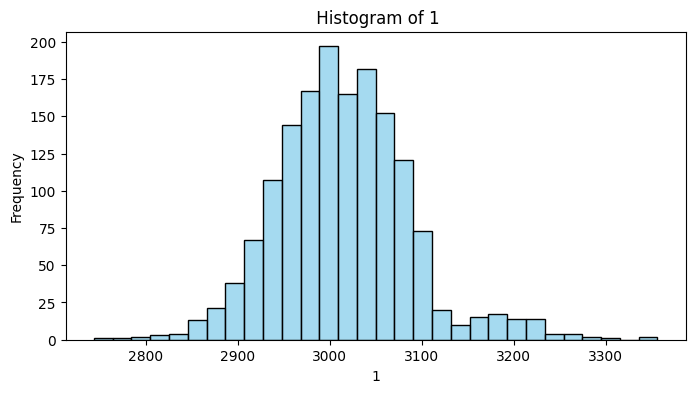

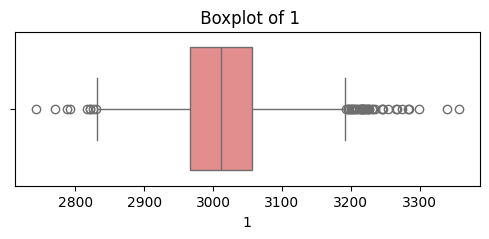

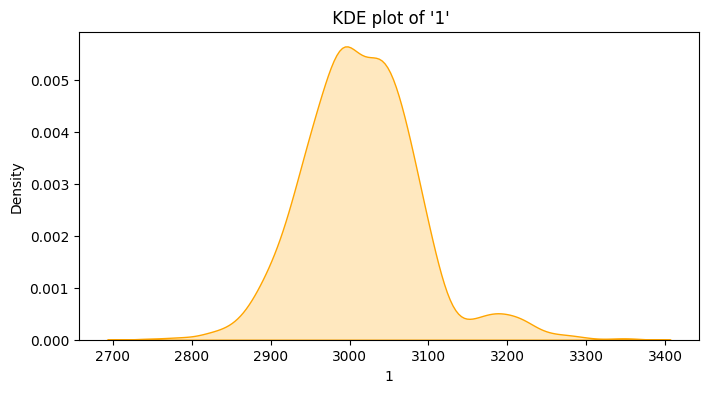

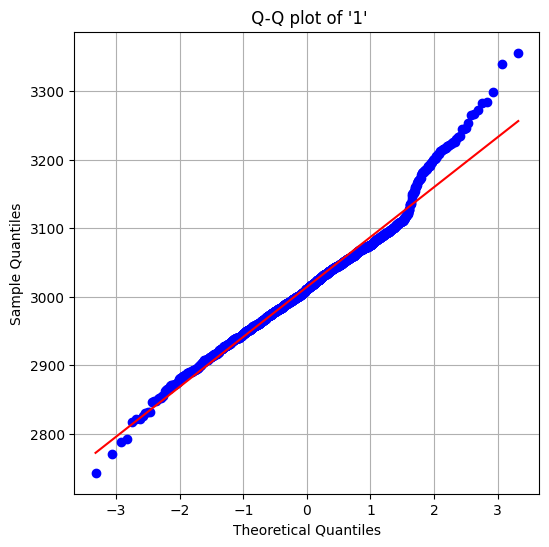


 Missing values in '1': 6

 Skewness of '1': 0.51
 Kurtosis of '1': 1.47
 '1' is moderately skewed.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats

class univariate_analyser:
    def __init__(self, data):
        self.data = data

    def describe_variables(self, col):
        print(f"\n Descriptive statistics for '{col}':\n")
        print(self.data[col].describe(include='all'))

    def missing_values(self, col):
        print(f"\n Missing values in '{col}': {self.data[col].isnull().sum()}")

    def value_counts(self, col):
        print(f"\n Value counts for '{col}':\n")
        print(self.data[col].value_counts())

    def countplot(self, col):
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.data[col], palette='Set2')
        plt.title(f' Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    def histogram(self, col):
        plt.figure(figsize=(8, 4))
        sns.histplot(self.data[col], bins=30, kde=False, color='skyblue')
        plt.title(f' Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    def boxplot(self, col):
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=self.data[col], color='lightcoral')
        plt.title(f" Boxplot of {col}")
        plt.xlabel(col)
        plt.show()

    def kde_plot(self, col):
        plt.figure(figsize=(8, 4))
        sns.kdeplot(self.data[col].dropna(), color='orange', fill=True)
        plt.title(f" KDE plot of '{col}'")
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

    def qq_plot(self, col):
        plt.figure(figsize=(6, 6))
        stats.probplot(self.data[col].dropna(), dist='norm', plot=plt)
        plt.title(f" Q-Q plot of '{col}'")
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')
        plt.grid(True)
        plt.show()

    def skewness_kurtosis(self, col):
        skewness = self.data[col].skew()
        kurtosis = self.data[col].kurtosis()
        print(f"\n Skewness of '{col}': {skewness:.2f}")
        print(f" Kurtosis of '{col}': {kurtosis:.2f}")
        if abs(skewness) < 0.5:
            print(f" '{col}' is approximately symmetric.")
        elif abs(skewness) < 1:
            print(f" '{col}' is moderately skewed.")
        else:
            print(f" '{col}' is highly skewed.")

    def detect_type(self, col):
        if self.data[col].dtype == 'object' or self.data[col].nunique() < 15:
            return 'categorical'
        else:
            return 'numerical'

    def run_all(self, col):
        print("=" * 60)
        print(f" Univariate analysis for '{col}'")
        print("-" * 60)
        
        var_type = self.detect_type(col)
        print(f" Variable type: {var_type.capitalize()}")

        if var_type == 'categorical':
            self.describe_variables(col)
            self.value_counts(col)
            self.countplot(col)
            self.missing_values(col)
        else:
            self.describe_variables(col)
            self.histogram(col)
            self.boxplot(col)
            self.kde_plot(col)
            self.qq_plot(col)
            self.missing_values(col)
            self.skewness_kurtosis(col)

        print("=" * 60)
df = pd.read_csv("C:/Users/user/Desktop/SECOM_DATA/cleaned_output.csv")
eda = univariate_analyser(df)

# Run analysis on a few variables
eda.run_all("1")


 Univariate analysis for '2'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for '2':

count    1560.000000
mean     2495.850231
std        80.407705
min      2158.750000
25%      2452.247500
50%      2499.405000
75%      2538.822500
max      2846.440000
Name: 2, dtype: float64


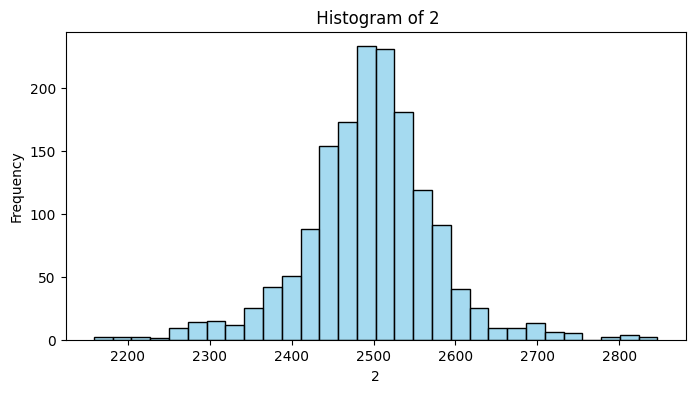

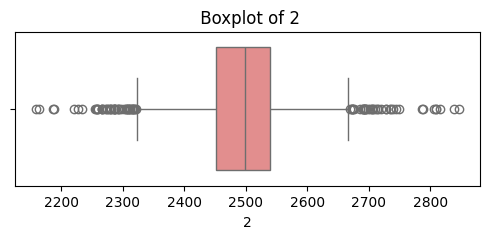

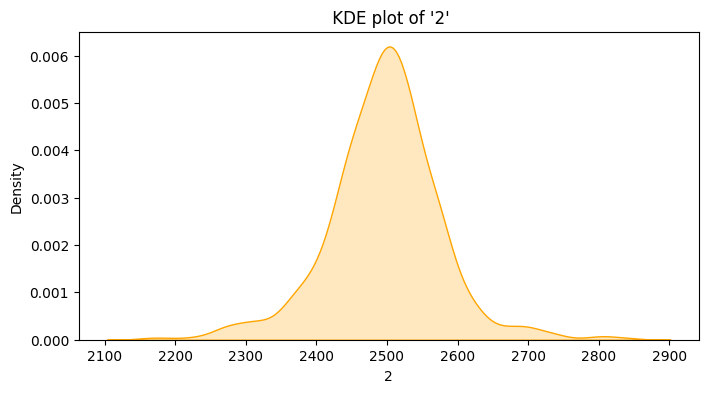

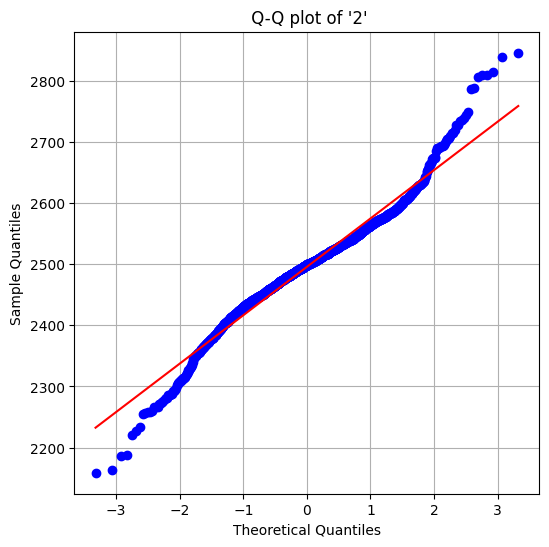


 Missing values in '2': 7

 Skewness of '2': -0.04
 Kurtosis of '2': 2.24
 '2' is approximately symmetric.


In [5]:
eda.run_all("2")

 Univariate analysis for '3'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for '3':

count    1553.000000
mean     2200.547318
std        29.513152
min      2060.660000
25%      2181.044400
50%      2201.066700
75%      2218.055500
max      2315.266700
Name: 3, dtype: float64


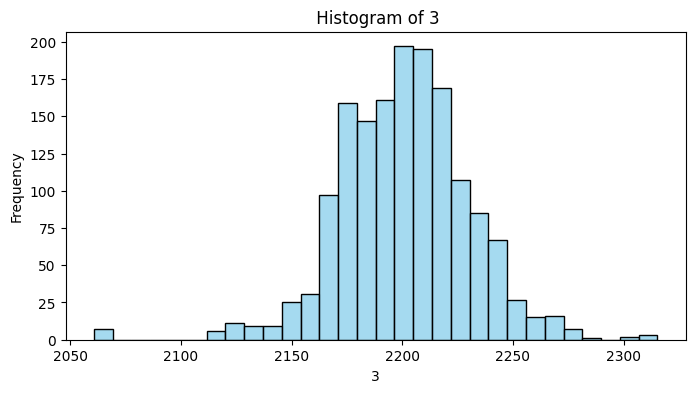

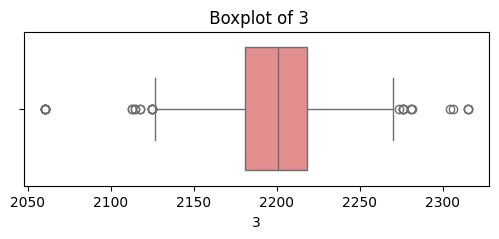

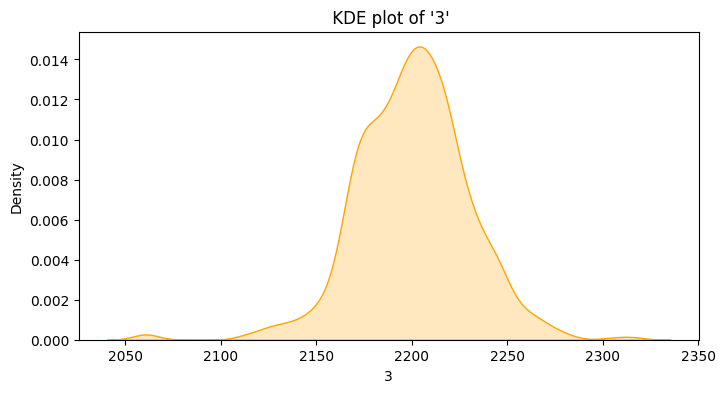

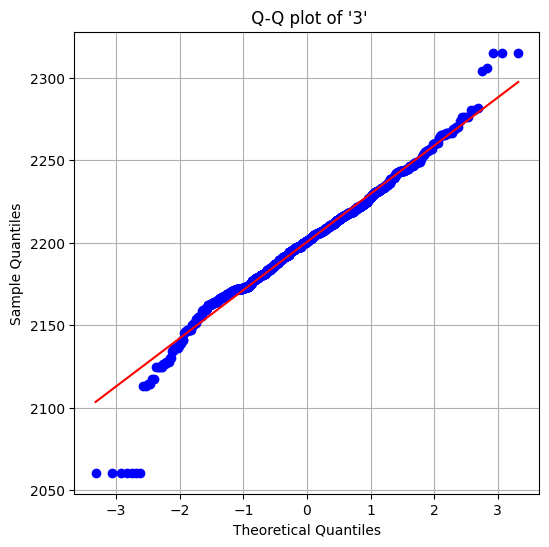


 Missing values in '3': 14

 Skewness of '3': -0.31
 Kurtosis of '3': 2.30
 '3' is approximately symmetric.


In [6]:
eda.run_all("3")

In [7]:
df["V475"]

0       0
1       0
2       1
3       0
4       0
       ..
1562    0
1563    0
1564    0
1565    0
1566    0
Name: V475, Length: 1567, dtype: int64

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df 
y = df["V475"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 40 features
top_40_features = feature_importance_df.head(40)

# Print or visualize the top 40 features
print(top_40_features)

    Feature  Importance
474    V475    0.299091
54       55    0.011251
59       60    0.009272
446     447    0.006126
60       61    0.006105
346     347    0.005777
38       39    0.005320
286     287    0.005166
293     294    0.005044
224     225    0.004910
19       20    0.004497
157     158    0.004235
438     439    0.004208
144     145    0.003955
276     277    0.003718
2         3    0.003664
65       66    0.003651
23       24    0.003627
387     388    0.003605
125     126    0.003547
468     469    0.003534
187     188    0.003530
77       78    0.003509
20       21    0.003474
58       59    0.003460
192     193    0.003405
47       48    0.003381
295     296    0.003278
418     419    0.003264
143     144    0.003251
467     468    0.003093
147     148    0.003090
256     257    0.003080
11       12    0.003049
453     454    0.003025
64       65    0.002967
349     350    0.002948
39       40    0.002945
203     204    0.002876
14       15    0.002859


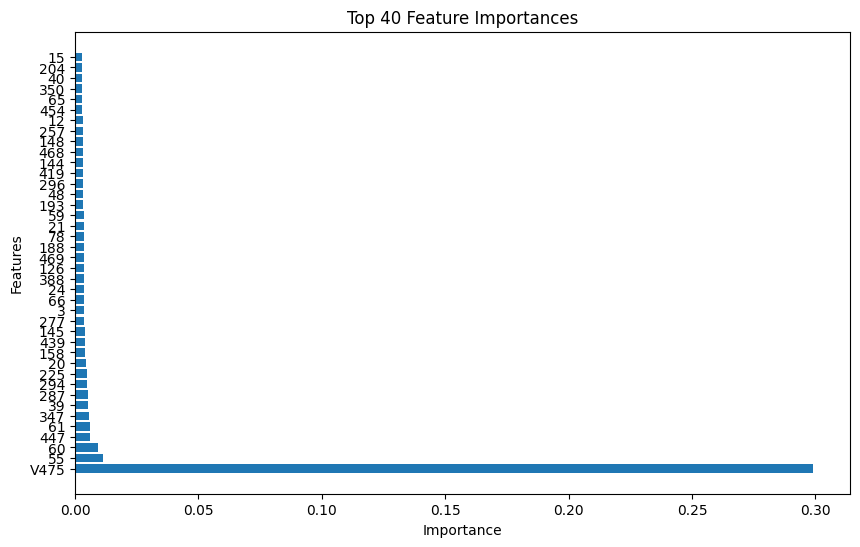

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(top_40_features['Feature'], top_40_features['Importance'])
plt.title("Top 40 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [10]:
# Select the top 40 features
top_40_features = feature_importance_df.head(40)
# Create a filtered DataFrame with only the top features
filtered_df = df[top_40_features['Feature'].values]
# Optionally, you can print or save the filtered DataFrame
print(filtered_df)
# If you want to save it to a new CSV file
filtered_df.to_csv('filtered_secom.csv', index=False)

      V475       55       60      447       61     347     39     287     294  \
0        0  -1.7264  21.7264      NaN  29.5367  1.7275  61.29  2.8551  0.0215   
1        0   0.8073  19.1927      NaN  27.6301  1.4857  78.25  2.4278  0.0142   
2        1  23.8245  16.1755  267.064  24.2829  1.8268  14.37  3.7663  0.0105   
3        0  24.3791  15.6209  268.228  23.4736  1.5441  76.90  3.0229  0.0407   
4        0 -12.2945  32.2945      NaN  44.1498  1.2943  76.39  3.0939  0.0246   
...    ...      ...      ...      ...      ...     ...    ...     ...     ...   
1562     0   2.8182  17.1818  264.272  22.4678  1.6027  81.21  1.9009     NaN   
1563     0  -3.3555  23.3555  266.832  31.4027  1.5880  79.43  2.9633     NaN   
1564     0   1.1664  18.8336  256.730  25.8939     NaN  82.03  1.7756     NaN   
1565     0   4.4682  15.5318  264.272  20.4223  1.0199  81.13  2.9282     NaN   
1566     0   1.8718  18.1282  257.974  23.3129     NaN  80.45  3.5173     NaN   

         225  ...     468  

 Conditional Univariate Analysis for 'V475' by 'V475'
------------------------------------------------------------
Skipping label column itself.
 Conditional Univariate Analysis for '55' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '55' by 'V475':

       count      mean        std      min      25%      50%        75%  \
V475                                                                      
0     1456.0  2.563464   9.313121 -28.9882 -1.97000  0.72225   3.897975   
1      104.0  8.515123  10.802344 -12.1527  1.05295  5.52230  15.468650   

           max  
V475            
0     168.1455  
1      53.6818  


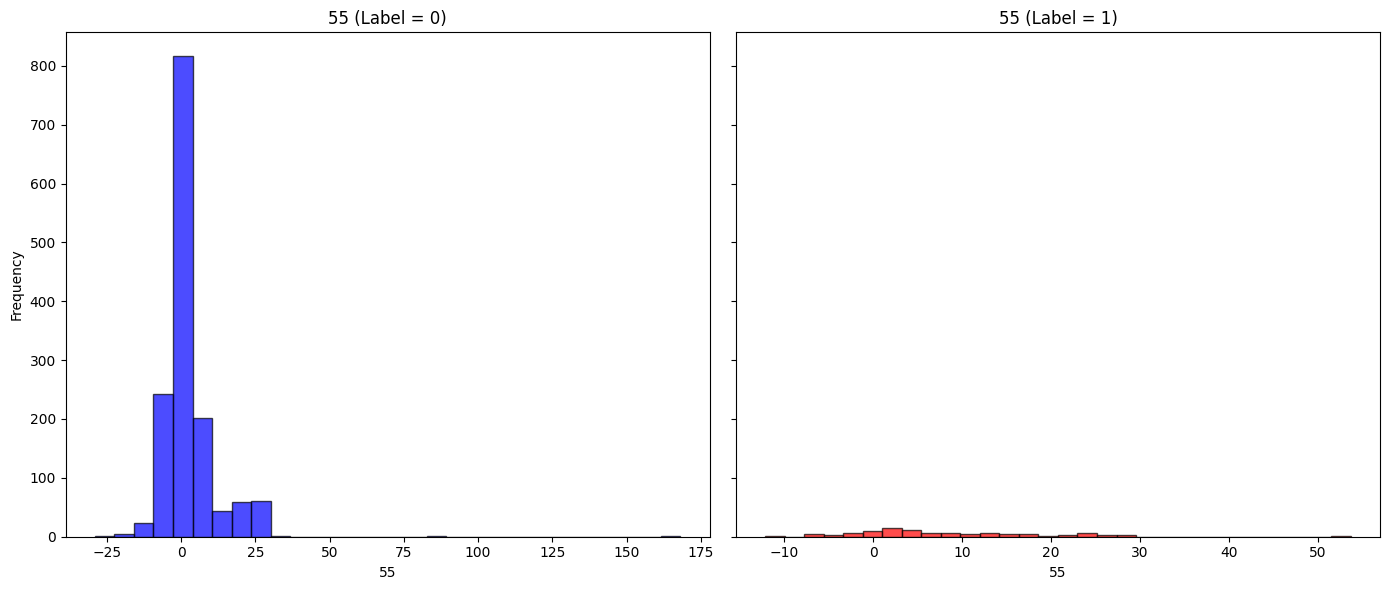

 Conditional Univariate Analysis for '60' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '60' by 'V475':

       count       mean       std     min        25%       50%        75%  \
V475                                                                        
0     1456.0  20.440291  4.729375  8.5145  17.401800  20.01185  22.664075   
1      104.0  21.967568  7.538980  6.4482  16.567275  20.85955  26.265250   

          max  
V475           
0     48.9882  
1     42.6300  


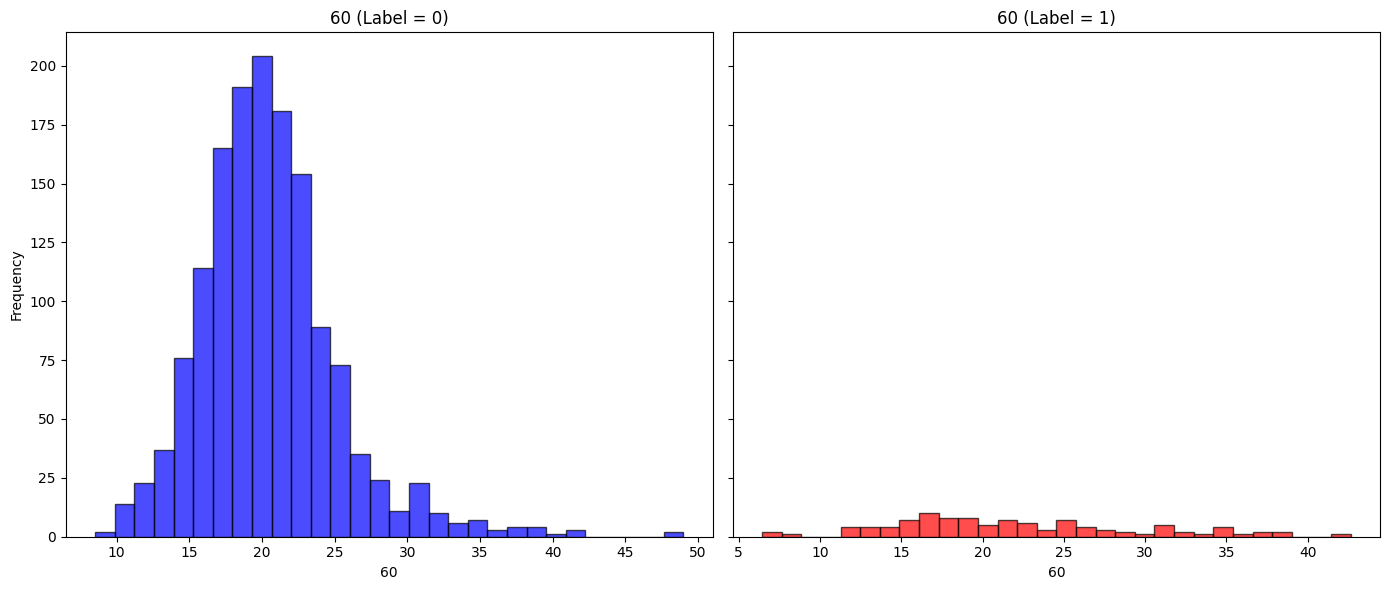

 Conditional Univariate Analysis for '447' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '447' by 'V475':

       count        mean       std      min       25%      50%      75%  \
V475                                                                      
0     1214.0  262.825563  7.564183  242.534  259.9580  264.272  265.812   
1       80.0  261.274700  8.495291  242.286  260.2505  264.272  265.149   

          max  
V475           
0     311.404  
1     279.470  


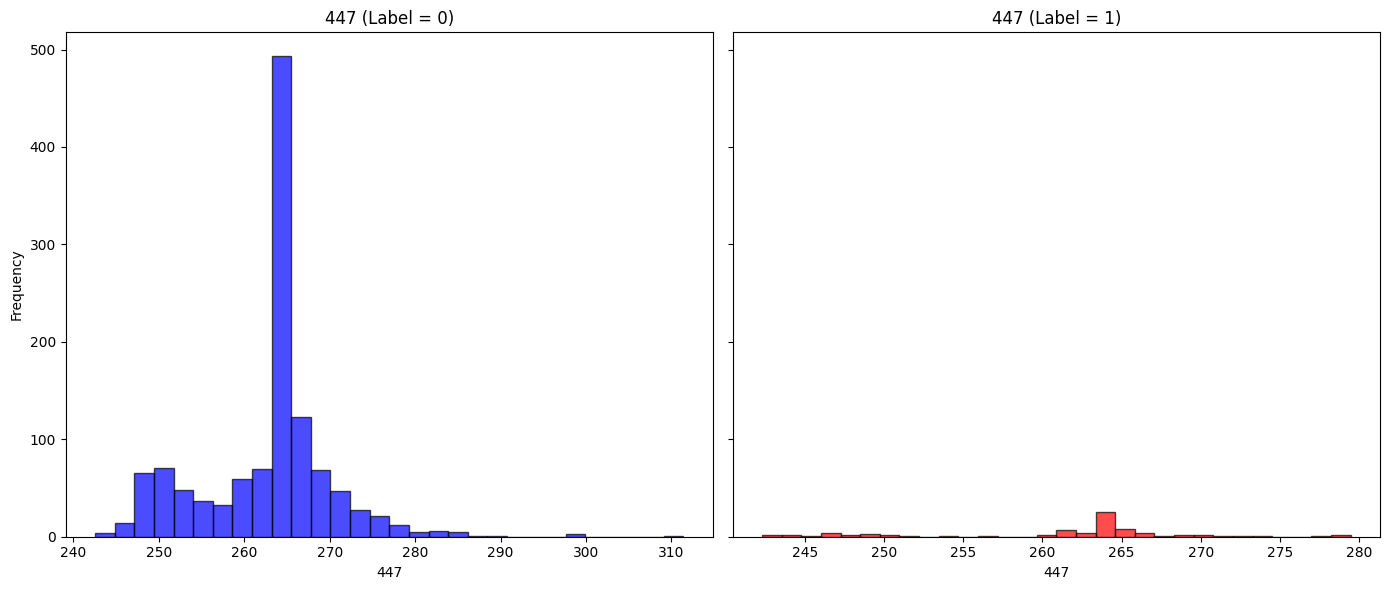

 Conditional Univariate Analysis for '61' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '61' by 'V475':

       count       mean       std     min       25%       50%       75%  \
V475                                                                      
0     1456.0  27.027496  6.951183  4.3080  23.15560  26.21745  29.78525   
1      104.0  28.592296  9.099575  8.7636  21.97175  27.97485  33.53480   

           max  
V475            
0     118.0836  
1      56.8964  


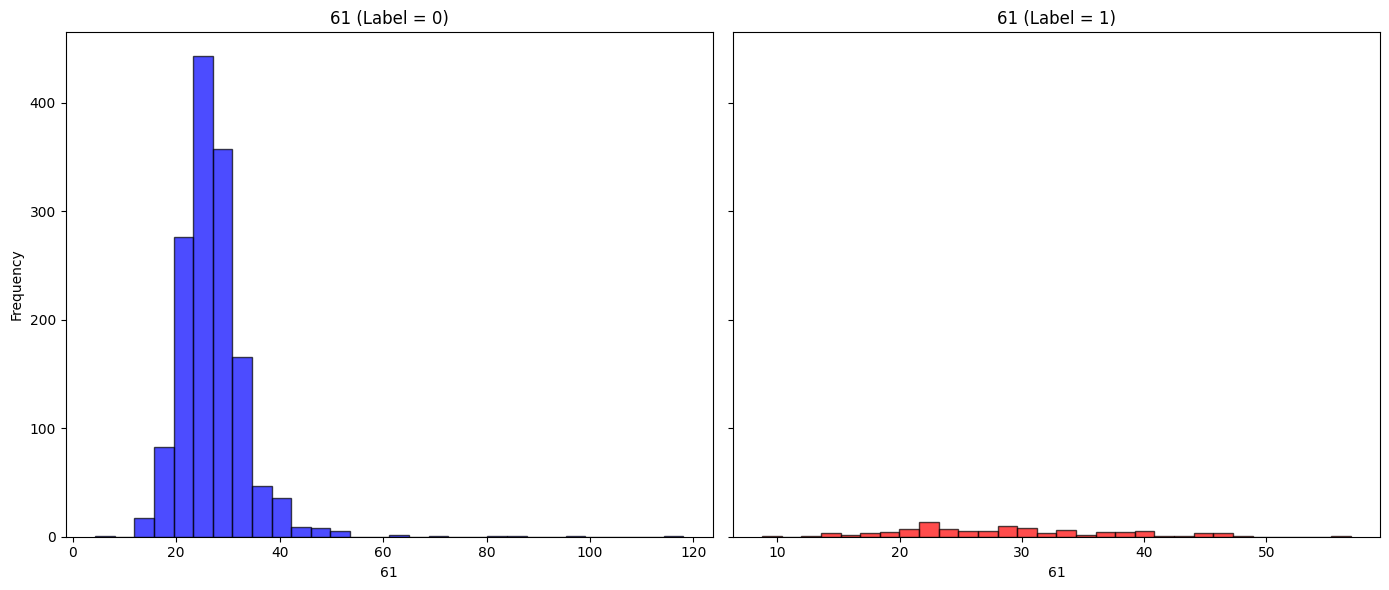

 Conditional Univariate Analysis for '347' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '347' by 'V475':

       count      mean       std     min       25%     50%       75%      max
V475                                                                         
0     1460.0  1.228399  1.011117  0.3813  0.747675  1.1258  1.518375  24.9904
1      104.0  1.310484  0.744331  0.3632  0.662975  1.3010  1.706025   6.0108


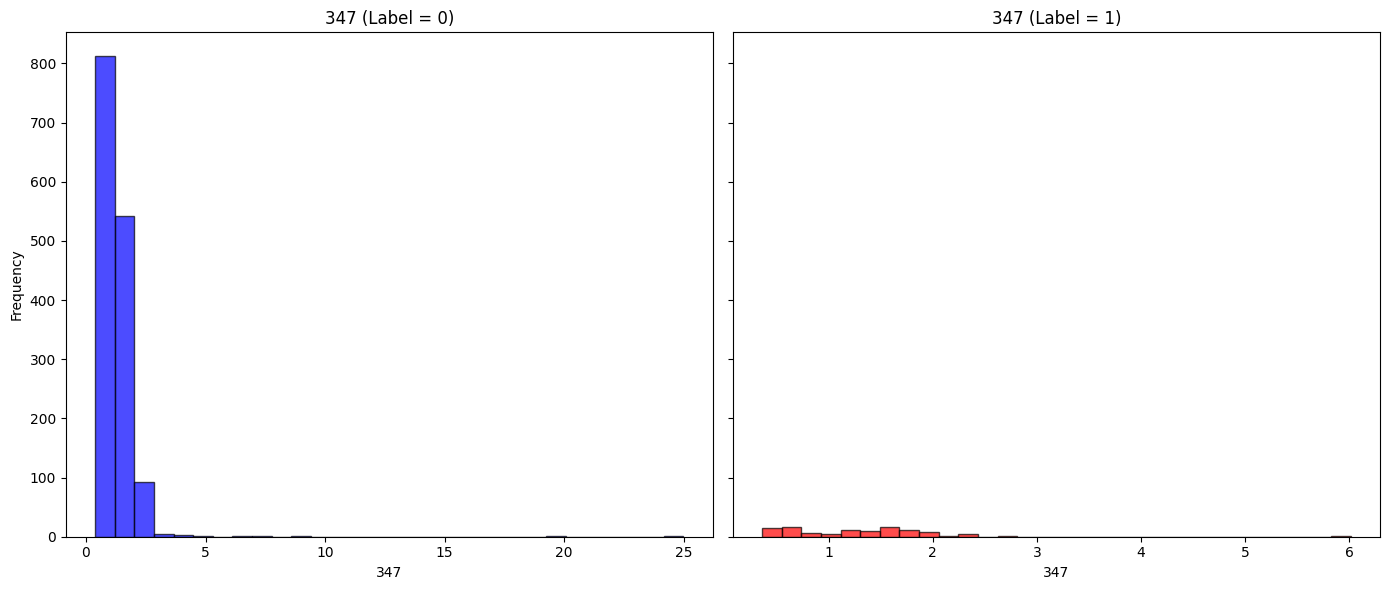

 Conditional Univariate Analysis for '39' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '39' by 'V475':

       count       mean        std    min      25%     50%     75%    max
V475                                                                     
0     1439.0  68.239842  23.846582  1.434  75.3400  78.330  80.265  86.12
1      104.0  63.270606  26.572767  2.332  64.9375  77.105  79.235  84.98


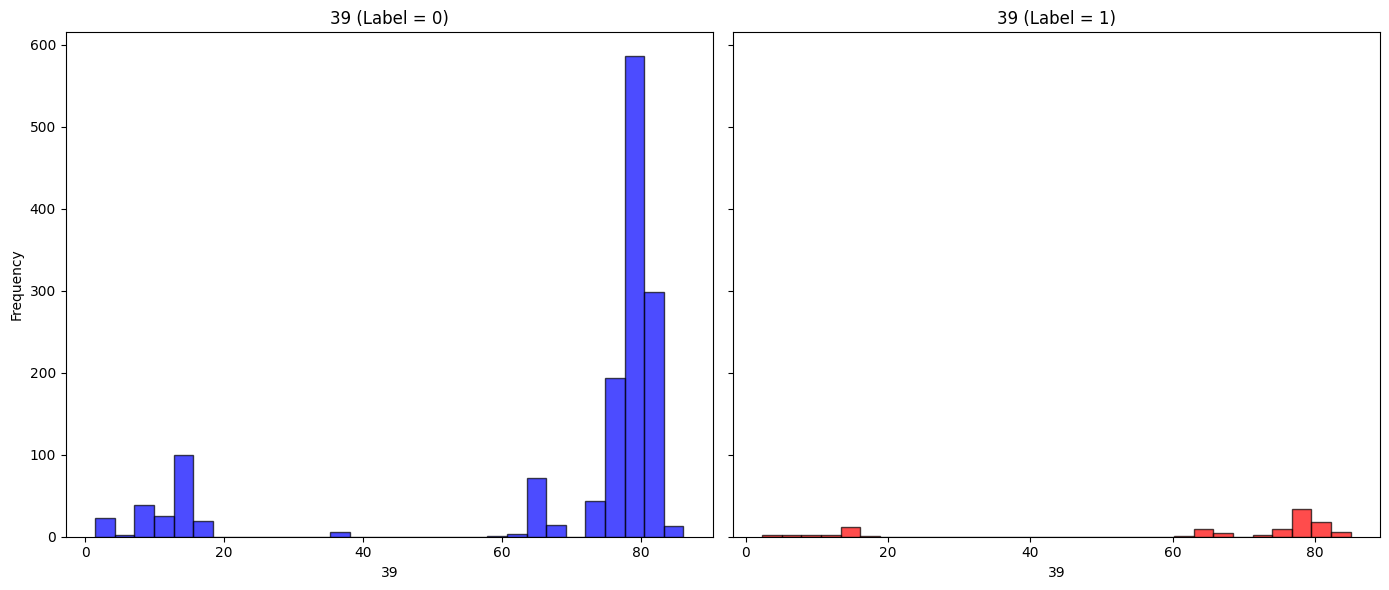

 Conditional Univariate Analysis for '287' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '287' by 'V475':

       count      mean       std     min       25%    50%       75%      max
V475                                                                        
0     1457.0  2.683376  3.557541  0.5741  1.895700  2.360  2.946100  97.7089
1      104.0  3.414611  4.934798  0.9517  2.014525  2.721  3.648925  51.7929


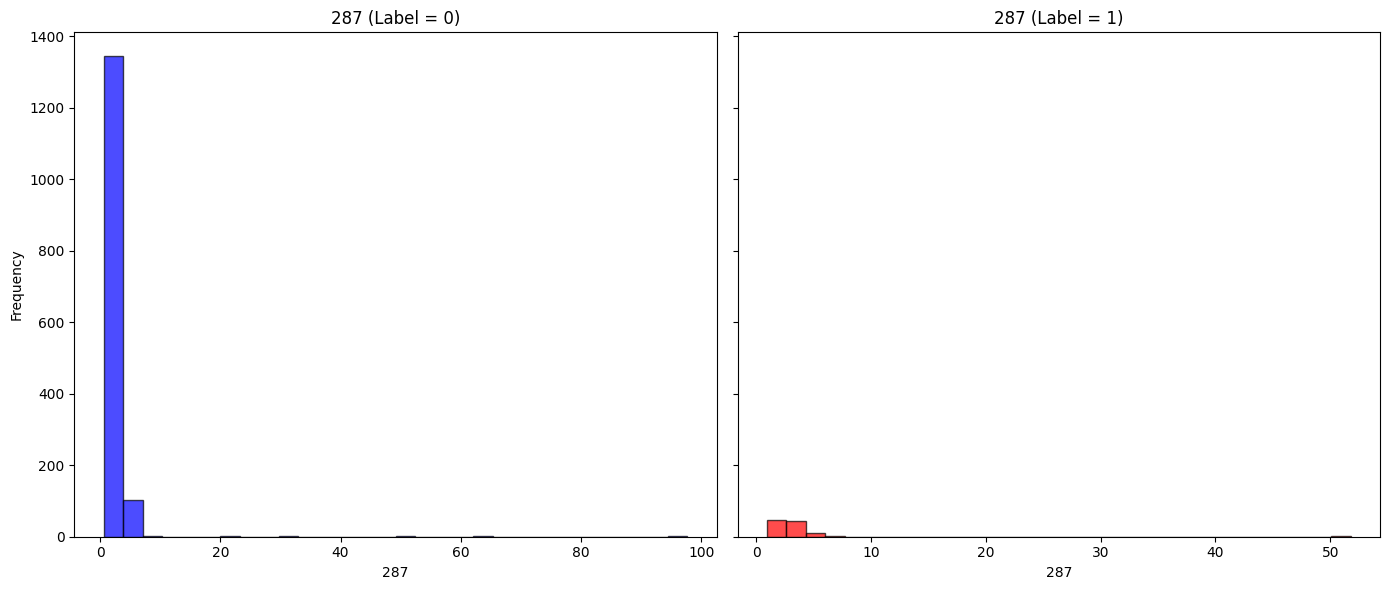

 Conditional Univariate Analysis for '294' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '294' by 'V475':

       count      mean       std     min      25%     50%       75%     max
V475                                                                       
0     1439.0  0.024291  0.010346  0.0103  0.01800  0.0225  0.027150  0.1251
1      104.0  0.030448  0.024014  0.0105  0.02075  0.0246  0.037025  0.2200


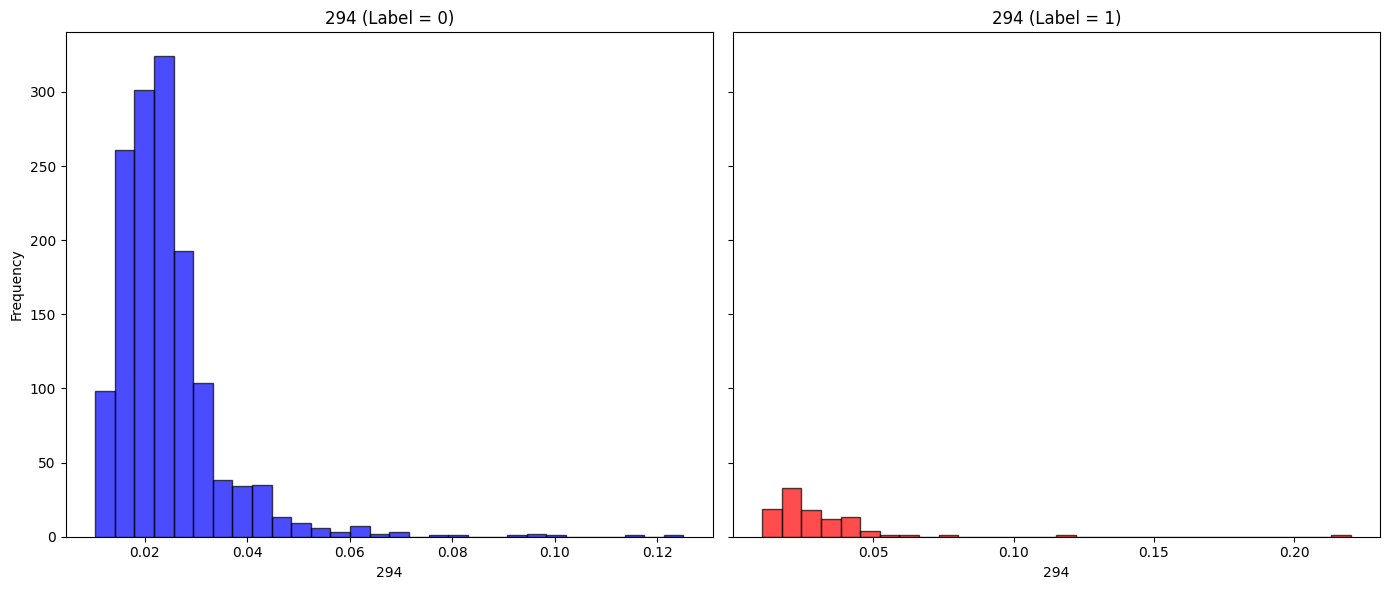

 Conditional Univariate Analysis for '225' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '225' by 'V475':

       count      mean       std     min     25%      50%       75%     max
V475                                                                       
0     1455.0  0.070705  0.029434  0.0198  0.0440  0.07110  0.091650  0.1578
1      104.0  0.068933  0.032613  0.0198  0.0356  0.06915  0.091625  0.1578


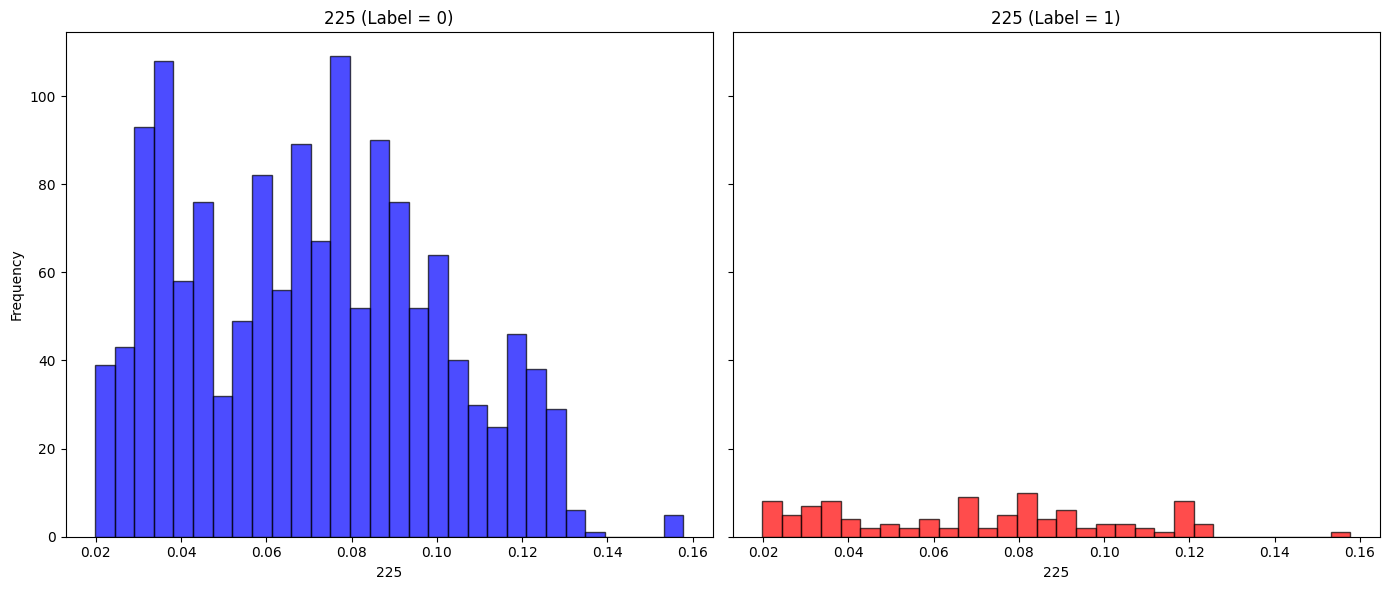

 Conditional Univariate Analysis for '20' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '20' by 'V475':

       count         mean         std      min       25%      50%        75%  \
V475                                                                           
0     1462.0 -5636.437585  593.798769 -7148.00 -5971.250 -5529.00 -5361.5625   
1      103.0 -5362.274272  950.378454 -7150.25 -5639.125 -5447.25 -5267.7500   

          max  
V475           
0        0.00  
1    -1368.75  


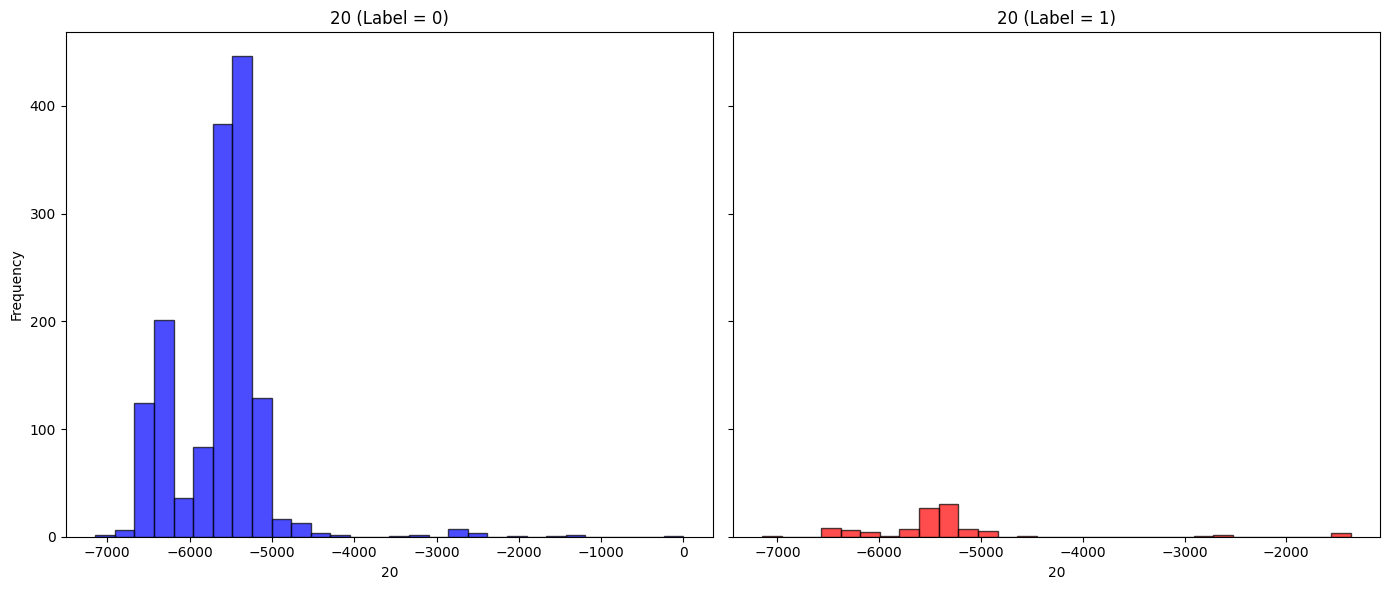

 Conditional Univariate Analysis for '158' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '158' by 'V475':

       count      mean       std  min  25%  50%   75%   max
V475                                                       
0     1462.0  2.773324  1.007949  0.8  2.1  2.6  3.20  18.9
1      103.0  3.009709  2.149624  1.2  2.1  2.7  3.25  21.1


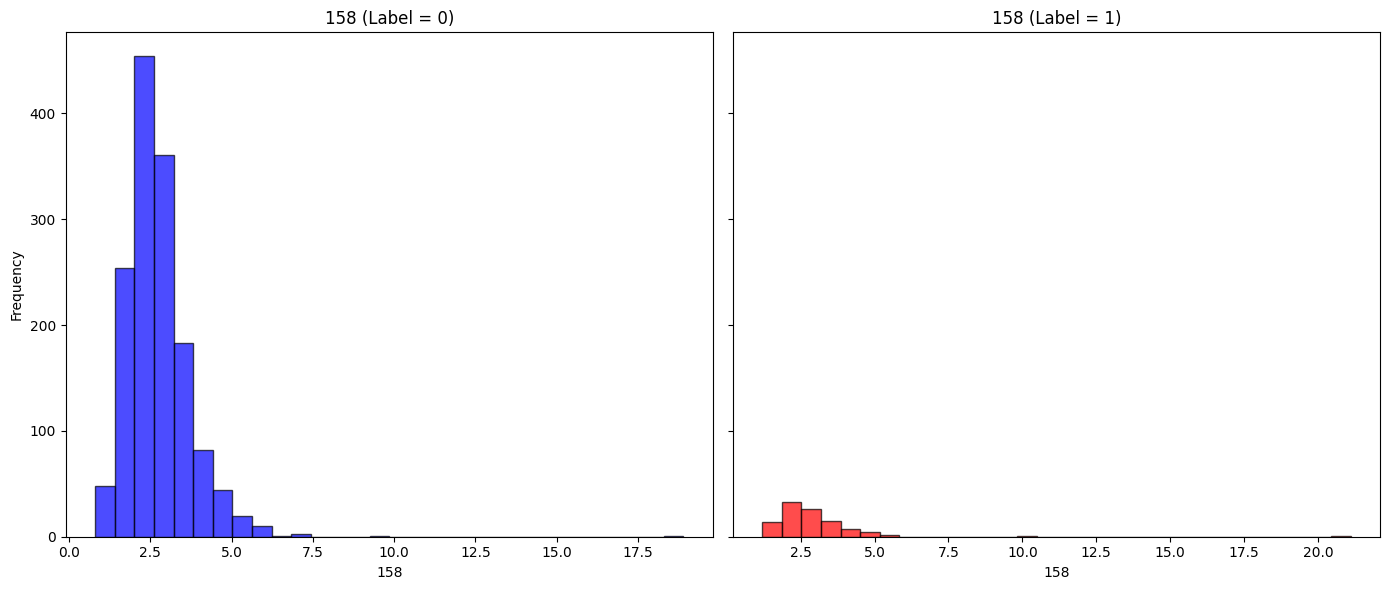

 Conditional Univariate Analysis for '439' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '439' by 'V475':

       count      mean       std     min      25%      50%      75%      max
V475                                                                        
0     1221.0  0.493477  0.523449  0.0520  0.34350  0.47670  0.56070  17.4781
1       86.0  0.648198  1.246930  0.0991  0.35445  0.49805  0.60435  11.1600


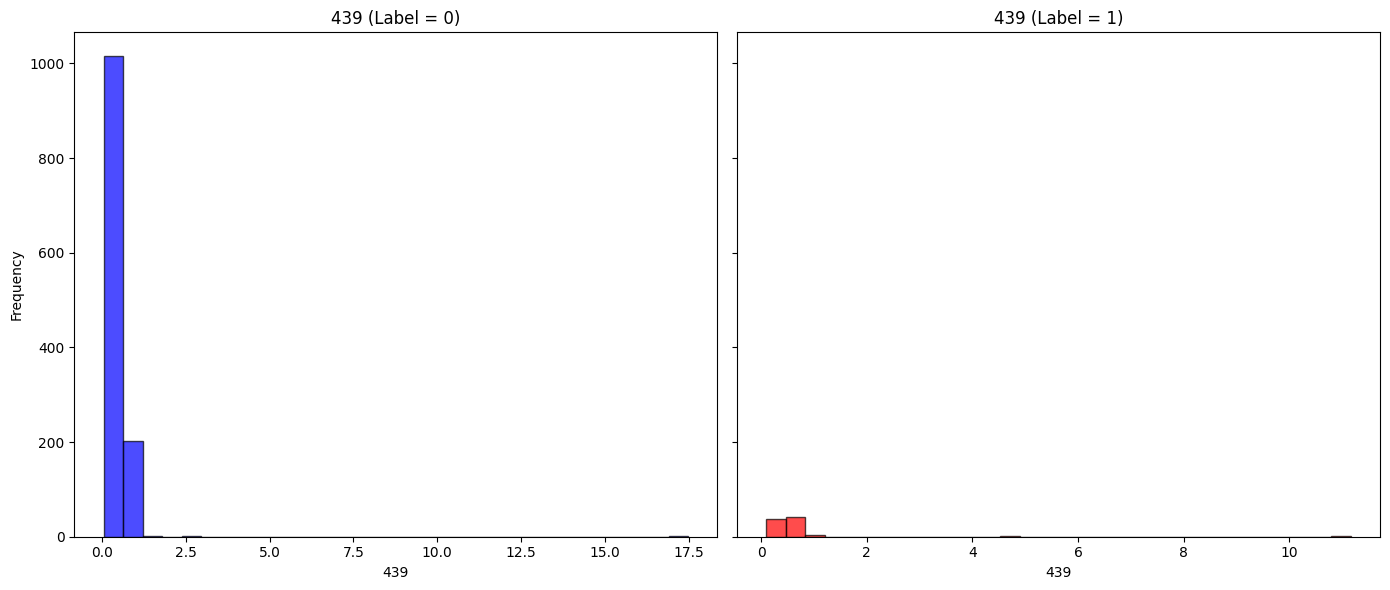

 Conditional Univariate Analysis for '145' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '145' by 'V475':

       count      mean       std     min     25%      50%      75%     max
V475                                                                      
0     1460.0  0.011872  0.009483  0.0037  0.0073  0.01090  0.01470  0.2389
1      104.0  0.012687  0.007138  0.0036  0.0065  0.01265  0.01655  0.0580


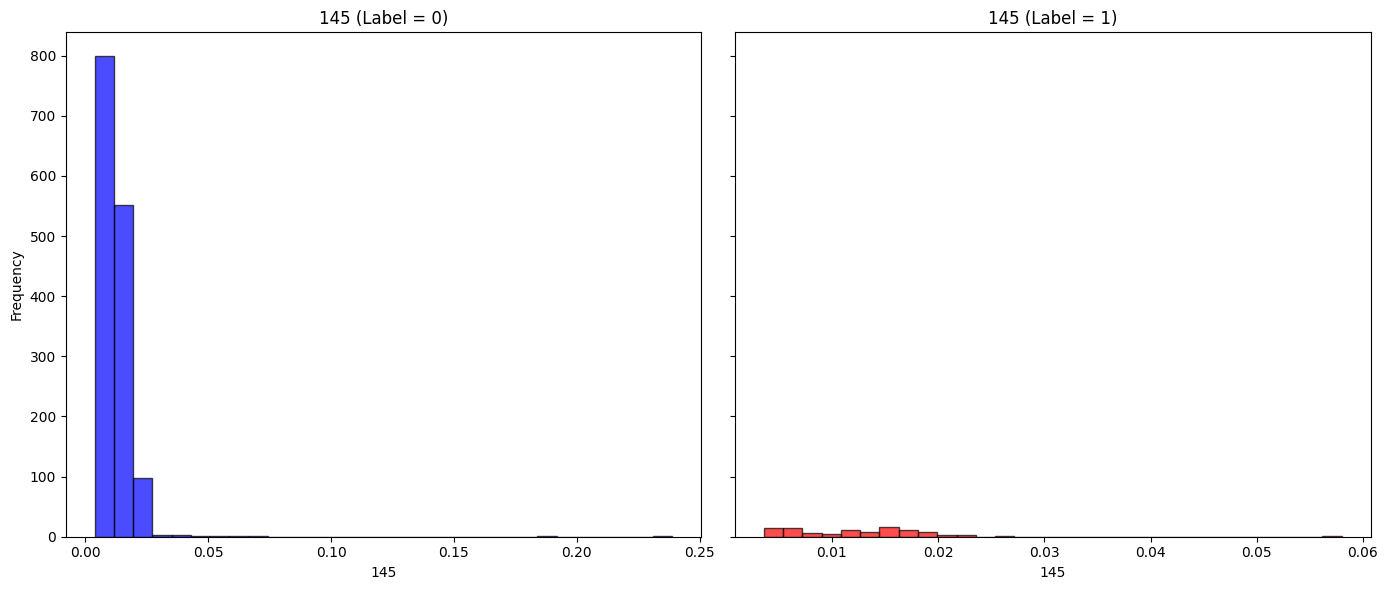

 Conditional Univariate Analysis for '277' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '277' by 'V475':

       count      mean       std     min      25%     50%      75%     max
V475                                                                      
0     1460.0  0.082645  0.061572  0.0224  0.06850  0.0845  0.09560  1.0959
1      103.0  0.091552  0.085434  0.0224  0.07725  0.0867  0.09685  0.6813


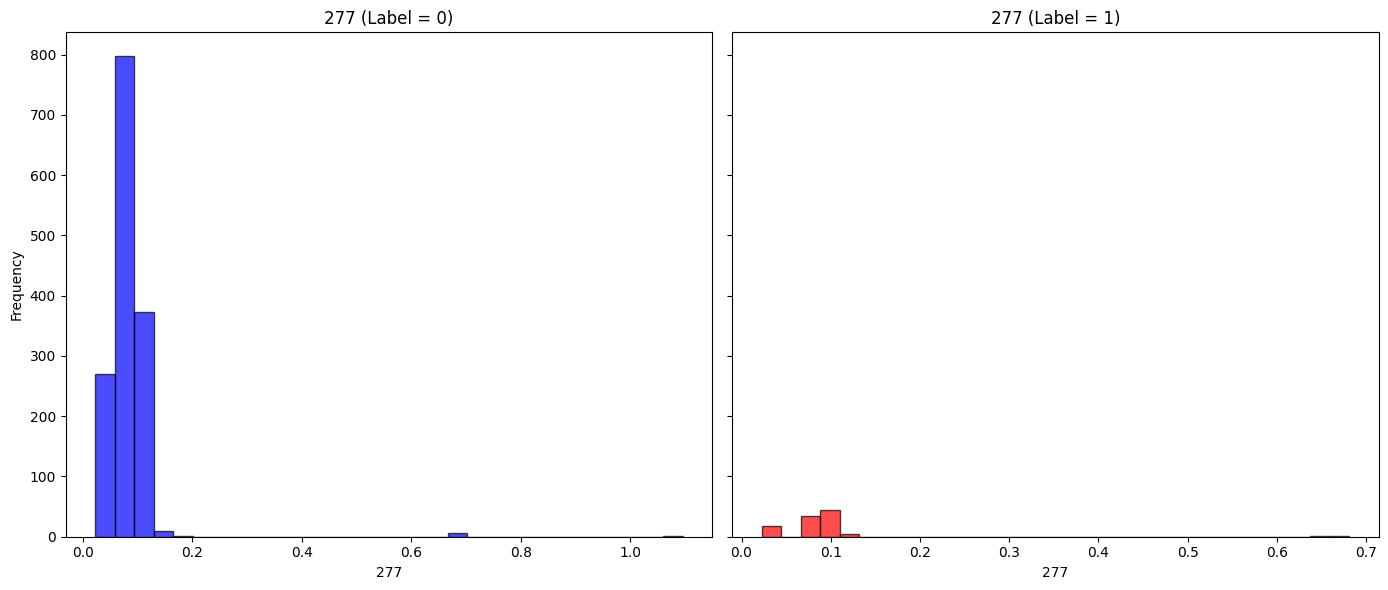

 Conditional Univariate Analysis for '3' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '3' by 'V475':

       count         mean        std        min          25%        50%  \
V475                                                                      
0     1449.0  2200.554886  29.391944  2060.6600  2181.188900  2201.0667   
1      104.0  2200.441877  31.302444  2138.8778  2173.480575  2196.6889   

              75%        max  
V475                          
0     2218.055500  2315.2667  
1     2218.936075  2315.2667  


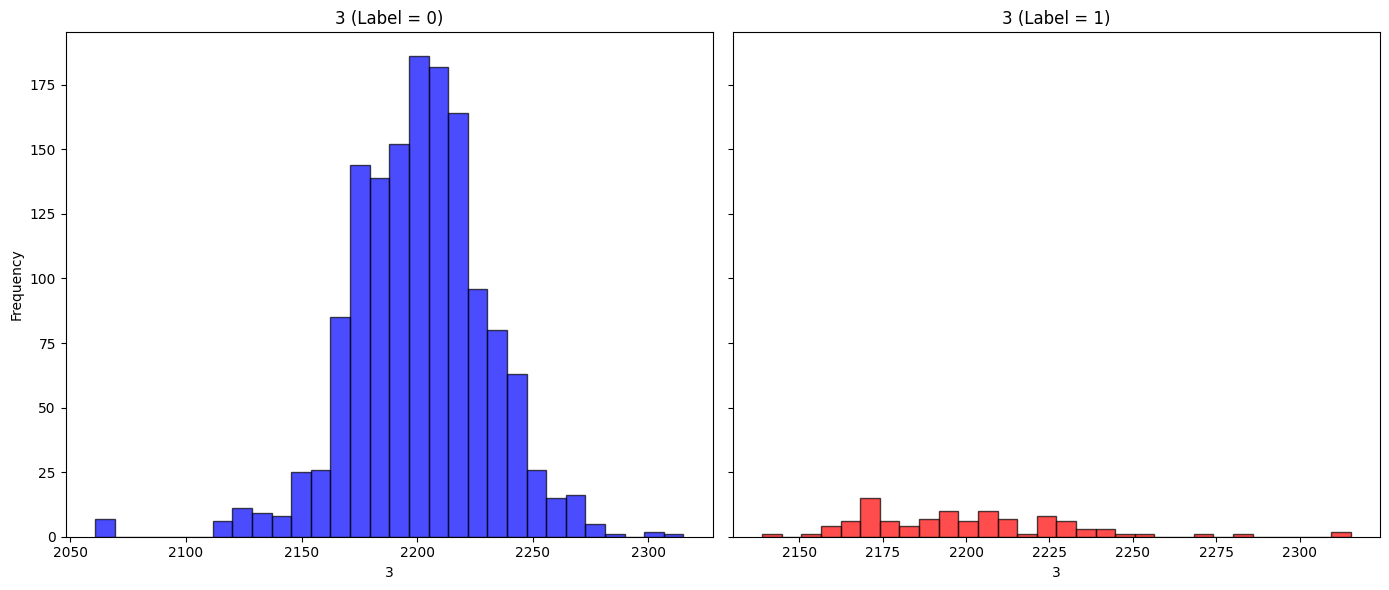

 Conditional Univariate Analysis for '66' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '66' by 'V475':

       count        mean        std      min       25%       50%       75%  \
V475                                                                         
0     1457.0  104.346280  31.196791  21.4332  87.71660  102.6512  115.7673   
1      104.0  104.087421  37.627584  21.8203  83.47295  100.6563  112.2129   

           max  
V475            
0     238.4775  
1     233.6113  


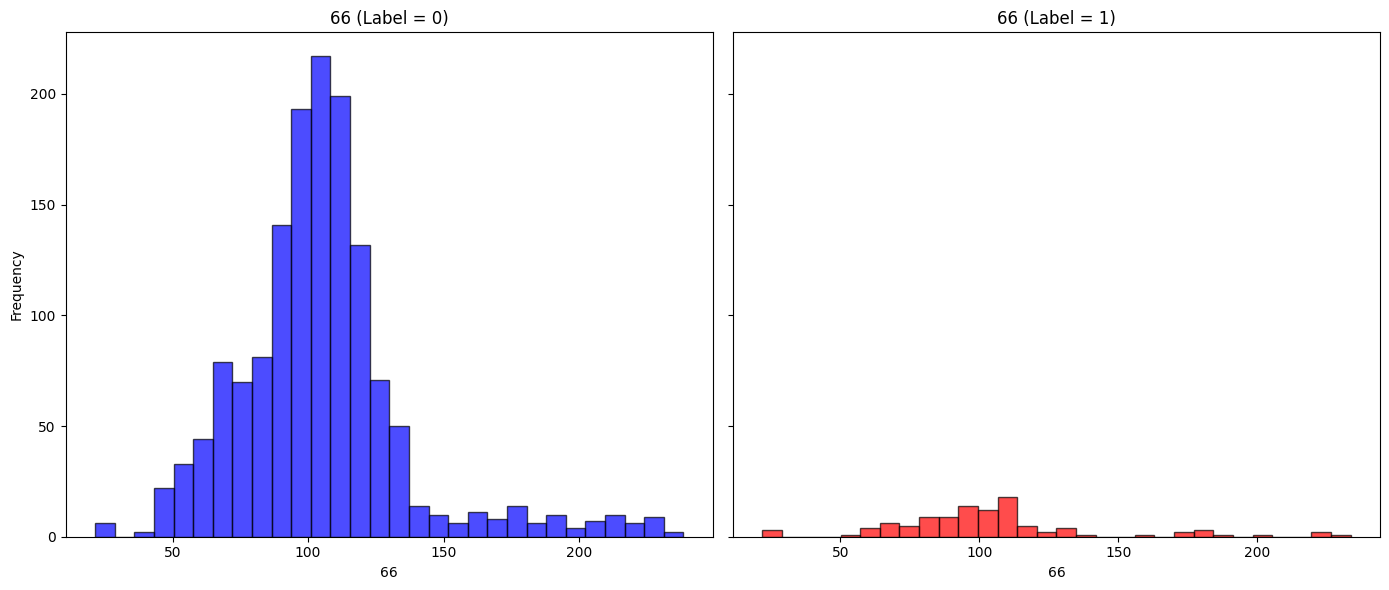

 Conditional Univariate Analysis for '24' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '24' by 'V475':

       count      mean       std     min       25%     50%      75%     max
V475                                                                       
0     1462.0  1.205567  0.170752  0.0000  1.093275  1.2833  1.30400  1.3745
1      103.0  1.179400  0.255687  0.2253  1.254850  1.2813  1.30645  1.3828


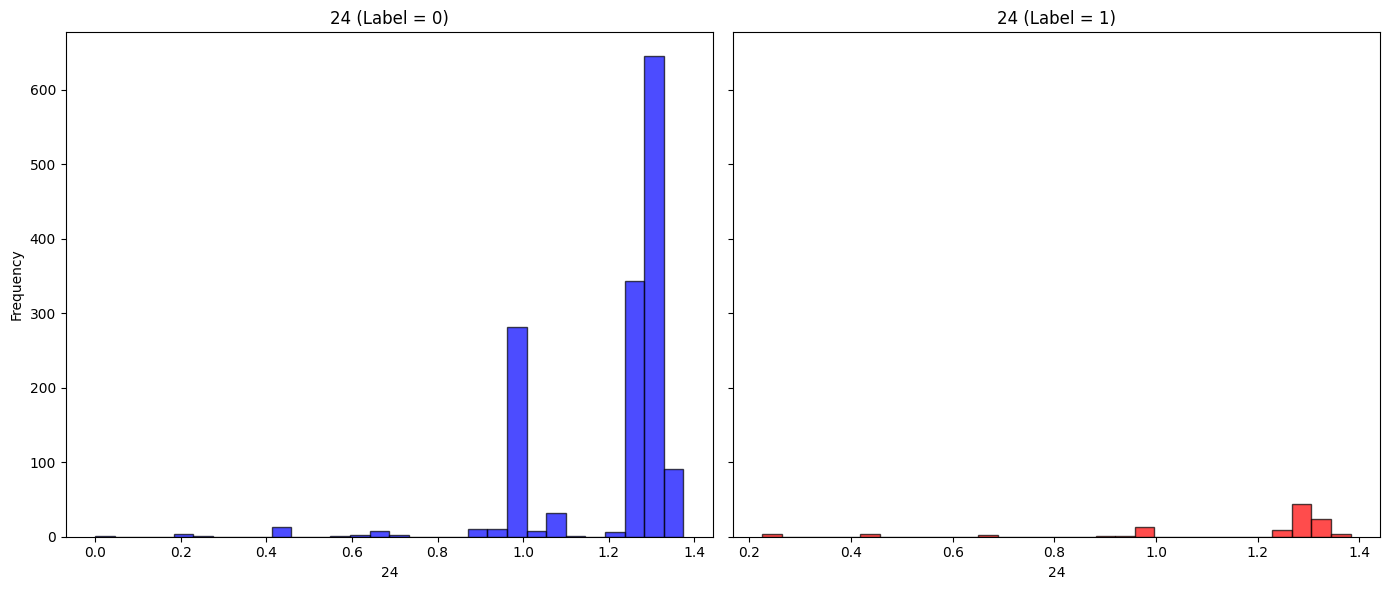

 Conditional Univariate Analysis for '388' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '388' by 'V475':

       count      mean        std     min       25%     50%       75%  \
V475                                                                    
0     1457.0  6.105094   9.556340  1.6872  4.072900  5.1912  6.583600   
1      104.0  8.398982  16.589919  2.0751  4.406375  6.1204  8.602725   

           max  
V475            
0     289.8264  
1     173.3631  


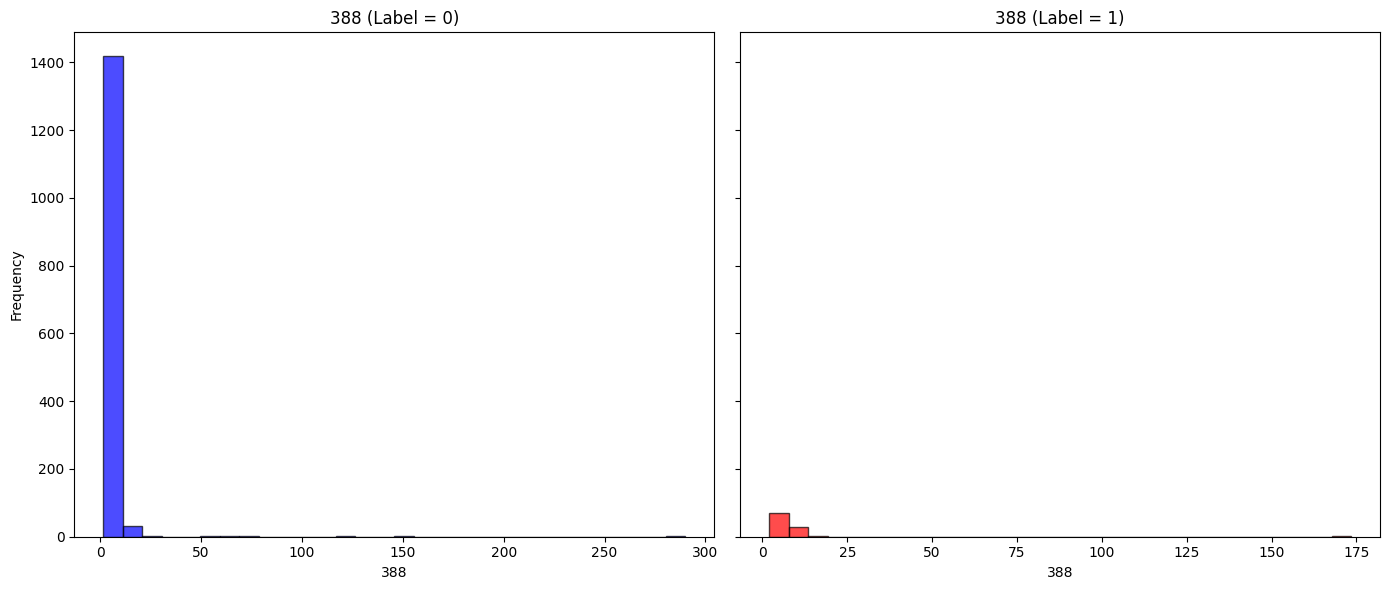

 Conditional Univariate Analysis for '126' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '126' by 'V475':

       count      mean       std     min       25%     50%       75%     max
V475                                                                        
0     1455.0  2.318539  0.052749  2.1911  2.277300  2.3122  2.357300  2.4723
1      104.0  2.318617  0.059173  2.1911  2.276925  2.3236  2.367775  2.4244


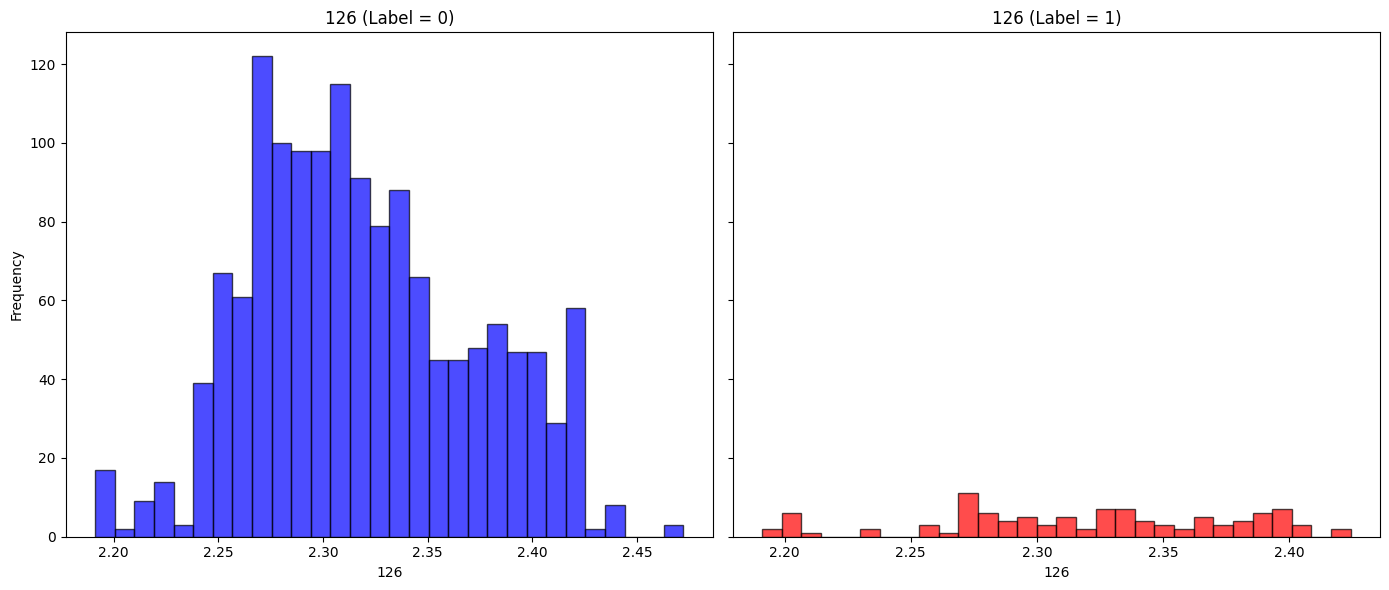

 Conditional Univariate Analysis for '469' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '469' by 'V475':

       count      mean       std     min     25%     50%     75%     max
V475                                                                    
0     1462.0  0.003841  0.003833  0.0017  0.0031  0.0036  0.0041  0.1045
1      104.0  0.003922  0.001400  0.0022  0.0030  0.0037  0.0042  0.0097


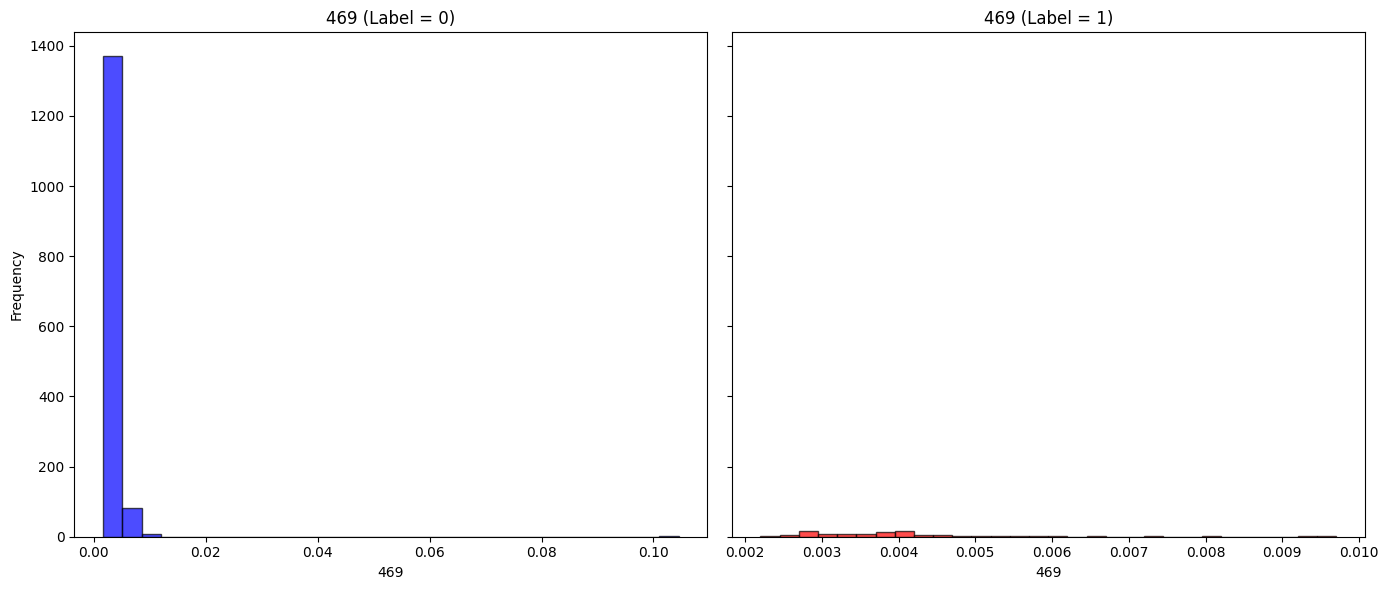

 Conditional Univariate Analysis for '188' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '188' by 'V475':

       count       mean        std  min  25%   50%     75%     max
V475                                                              
0     1457.0   8.884743  11.290640  2.3  6.0  7.66   9.790  320.05
1      104.0  11.367019  14.474547  3.1  6.6  9.16  12.815  150.87


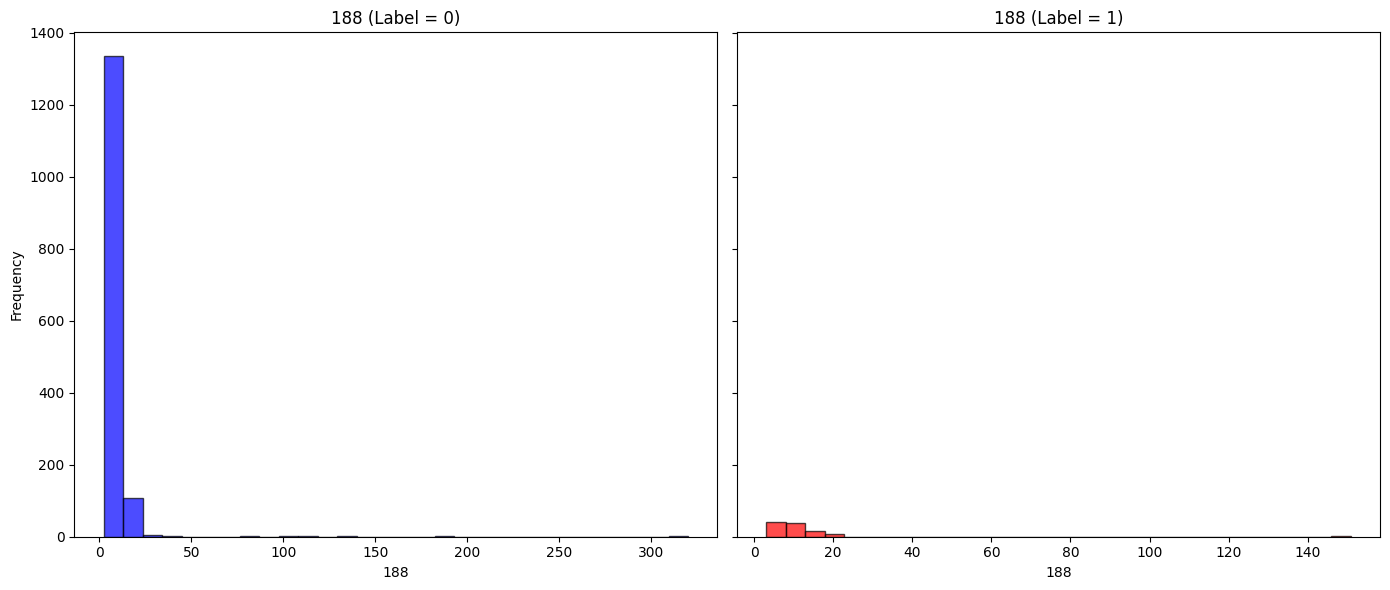

 Conditional Univariate Analysis for '78' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '78' by 'V475':

       count      mean       std     min       25%     50%       75%     max
V475                                                                        
0     1462.0  7.455438  0.514376  5.8257  7.106775  7.4792  7.809500  8.9904
1      104.0  7.404669  0.542300  5.9468  7.096250  7.3836  7.693775  8.8710


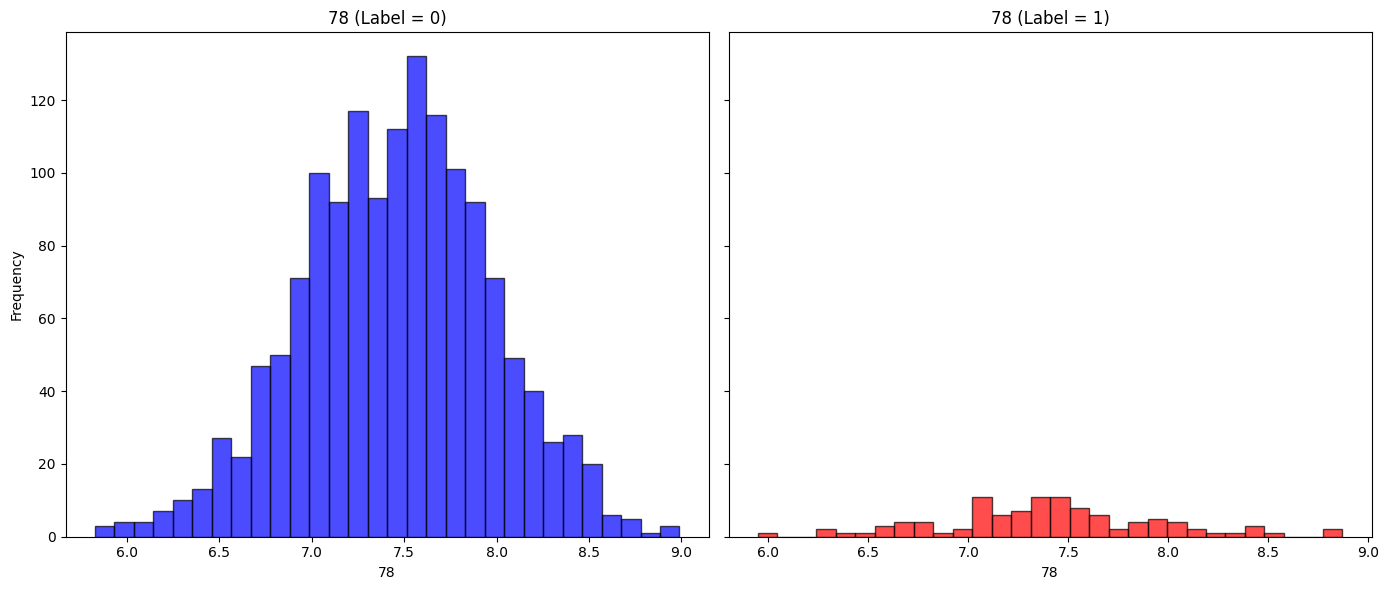

 Conditional Univariate Analysis for '21' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '21' by 'V475':

       count         mean         std    min      25%      50%      75%  \
V475                                                                      
0     1462.0  2705.158174  279.780022    0.0  2578.25  2665.25  2851.75   
1      103.0  2617.339806  458.716872  609.5  2561.50  2635.75  2756.00   

          max  
V475           
0     3656.25  
1     3493.75  


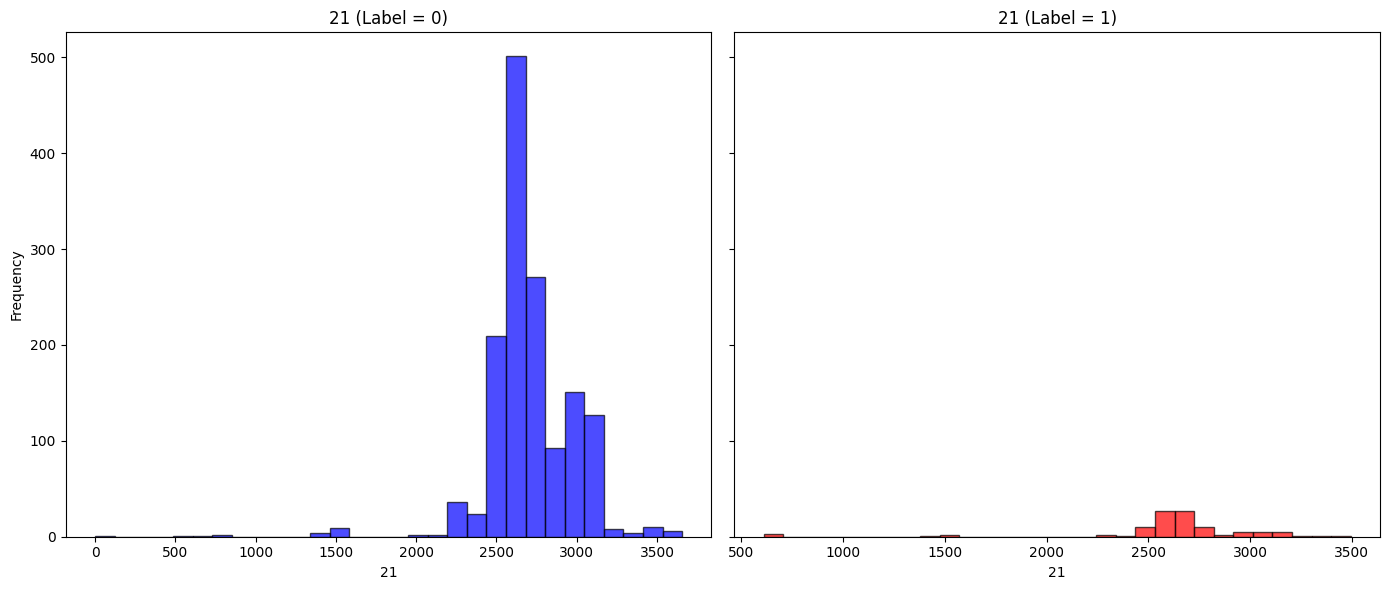

 Conditional Univariate Analysis for '59' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '59' by 'V475':

       count       mean       std     min        25%      50%       75%  \
V475                                                                      
0     1456.0  13.875941  7.067502  1.6591  10.349075  13.2255  16.24335   
1      104.0  15.585730  7.676164  3.7778  10.651125  13.4103  18.05980   

           max  
V475            
0     188.0923  
1      53.9451  


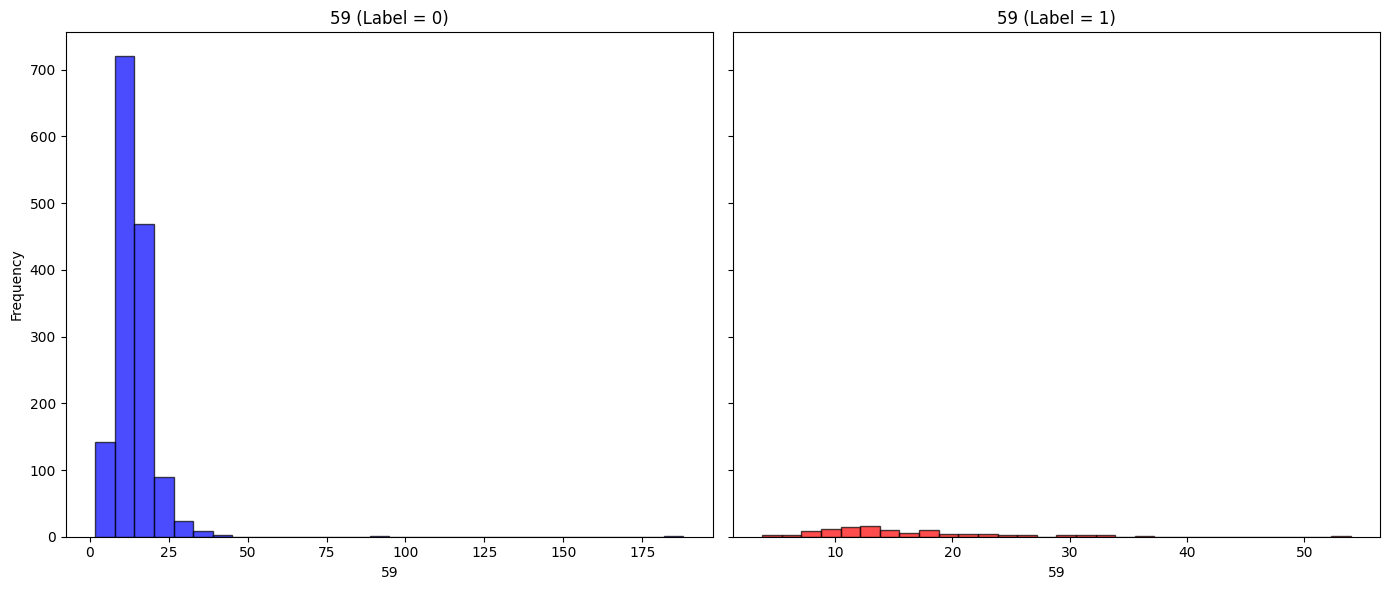

 Conditional Univariate Analysis for '193' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '193' by 'V475':

       count      mean       std     min      25%      50%       75%     max
V475                                                                        
0     1439.0  0.087707  0.039025  0.0319  0.06535  0.07900  0.098250  0.4590
1      104.0  0.104906  0.070351  0.0339  0.06855  0.08555  0.123475  0.5164


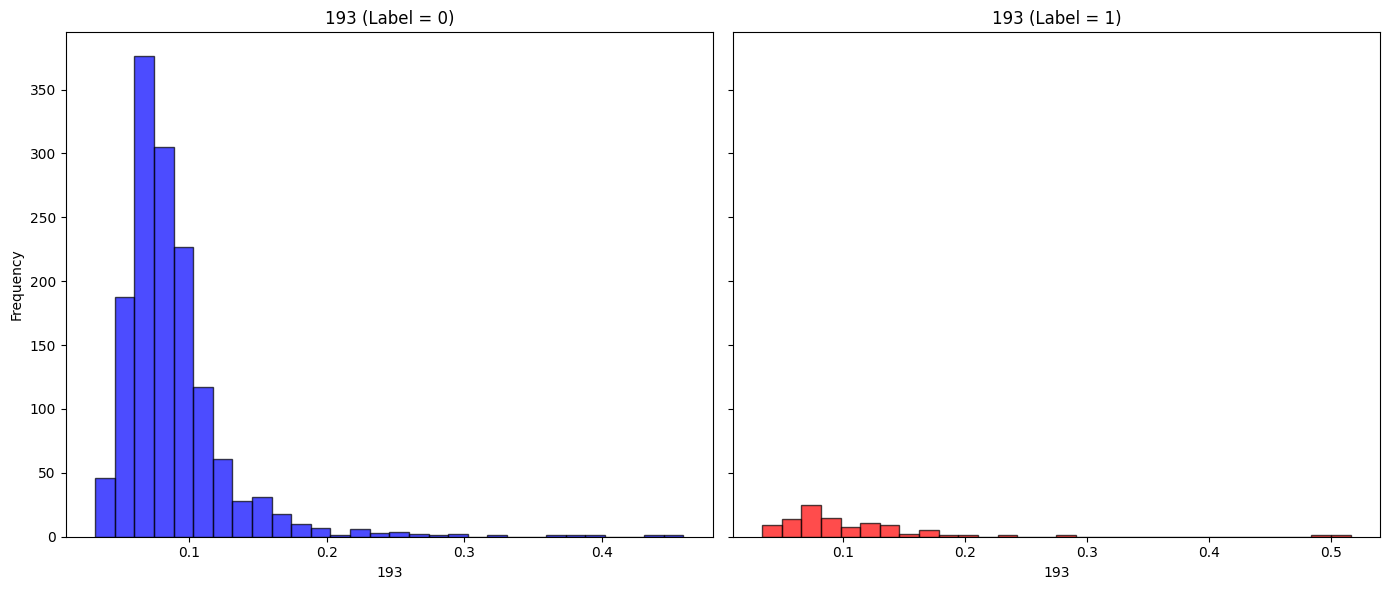

 Conditional Univariate Analysis for '48' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '48' by 'V475':

       count        mean        std      min        25%       50%         75%  \
V475                                                                            
0     1462.0  157.323447  60.659297  40.7874  115.63560  182.2799  206.960800   
1      104.0  158.792243  64.840525  40.2614  111.34825  193.0888  207.442825   

           max  
V475            
0     258.5432  
1     239.4934  


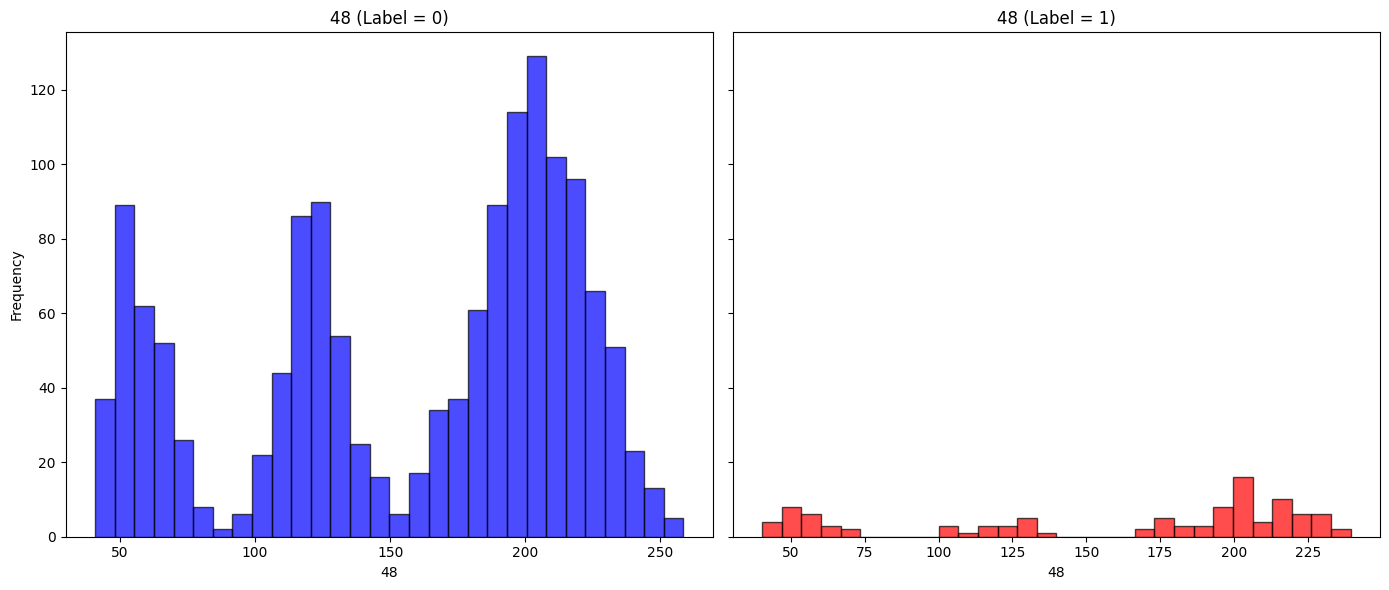

 Conditional Univariate Analysis for '296' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '296' by 'V475':

       count      mean       std     min       25%      50%       75%     max
V475                                                                         
0     1439.0  0.023190  0.014459  0.0029  0.014600  0.01880  0.028400  0.2914
1      104.0  0.023369  0.012393  0.0043  0.014175  0.01895  0.030675  0.0673


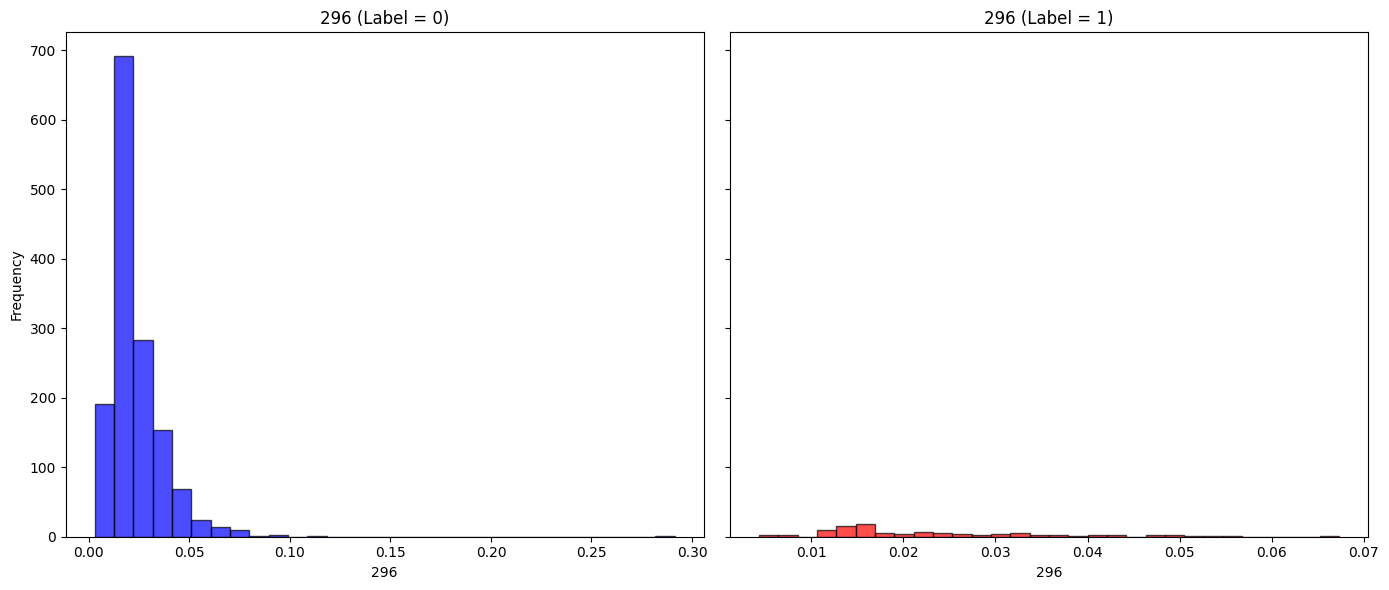

 Conditional Univariate Analysis for '419' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '419' by 'V475':

       count      mean       std     min      25%     50%       75%       max
V475                                                                         
0     1463.0  0.465395  4.288530  0.0258  0.07365  0.1001  0.133700  111.3330
1      104.0  0.292142  0.680726  0.0258  0.06945  0.0926  0.127025    4.0213


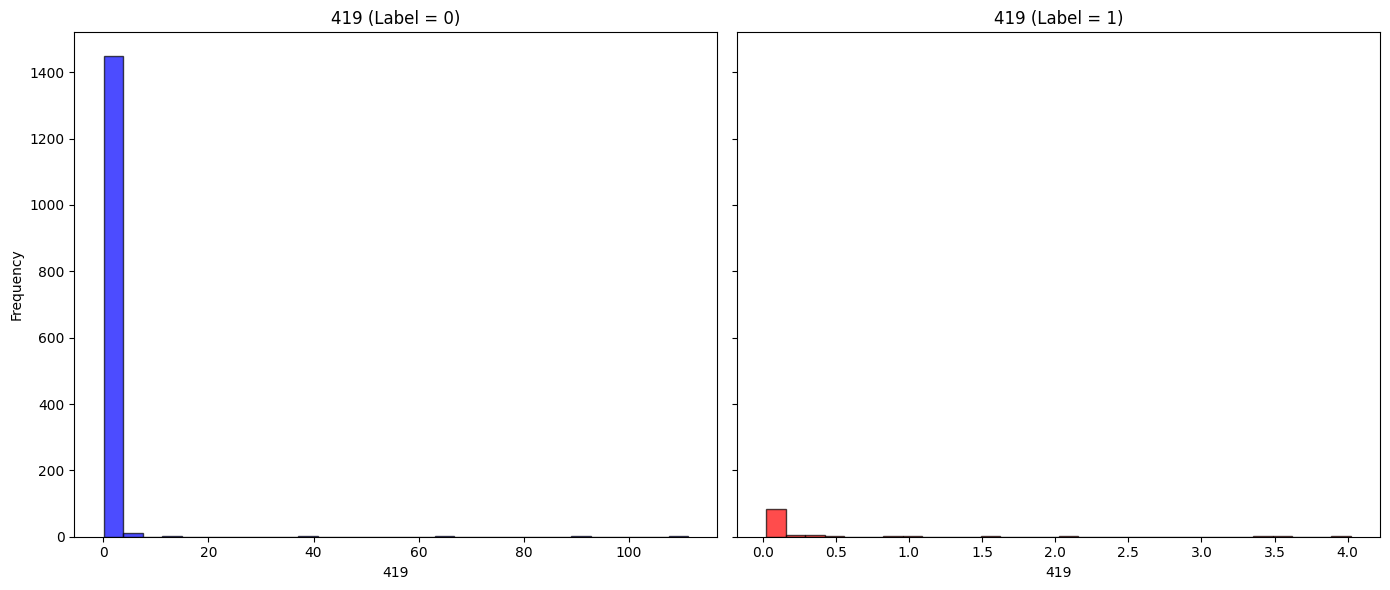

 Conditional Univariate Analysis for '144' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '144' by 'V475':

       count      mean        std     min      25%     50%       75%       max
V475                                                                          
0     1460.0  1.225472  24.181141  0.1609  0.37165  0.4656  0.659550  924.3780
1      104.0  0.793280   0.846763  0.1544  0.39485  0.5216  0.943725    5.8658


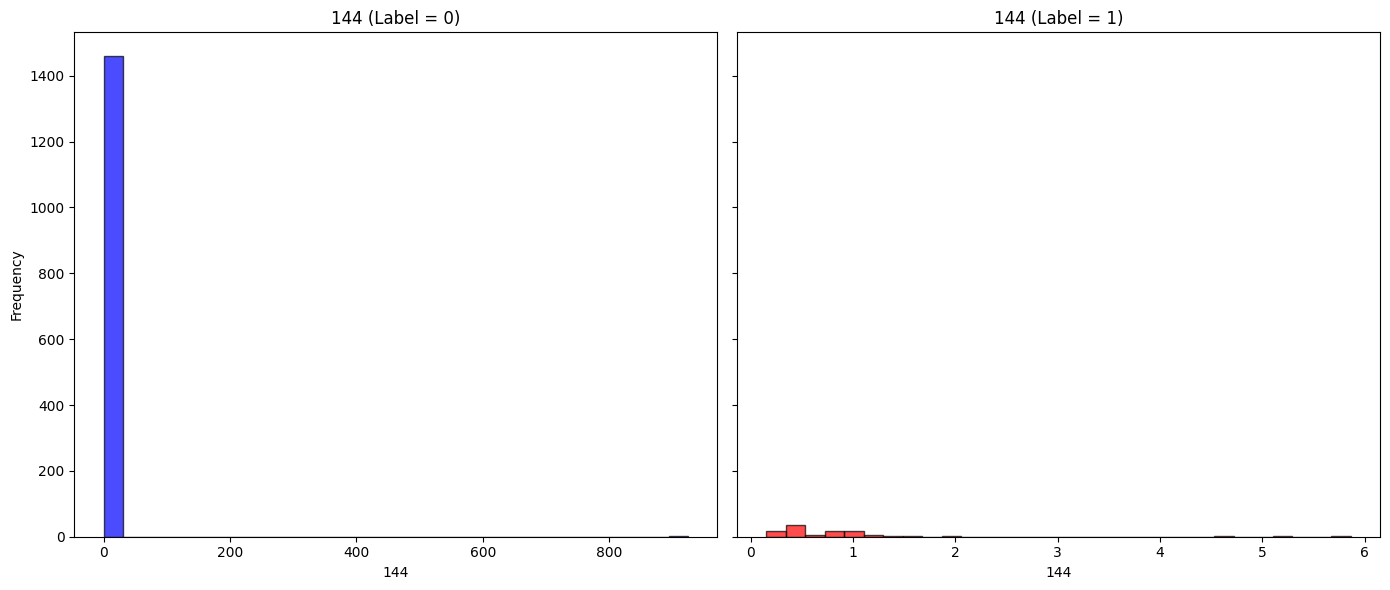

 Conditional Univariate Analysis for '468' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '468' by 'V475':

       count      mean       std     min     25%     50%       75%     max
V475                                                                      
0     1462.0  0.015290  0.017682  0.0060  0.0116  0.0138  0.016400  0.4766
1      104.0  0.015703  0.007046  0.0087  0.0115  0.0138  0.017025  0.0460


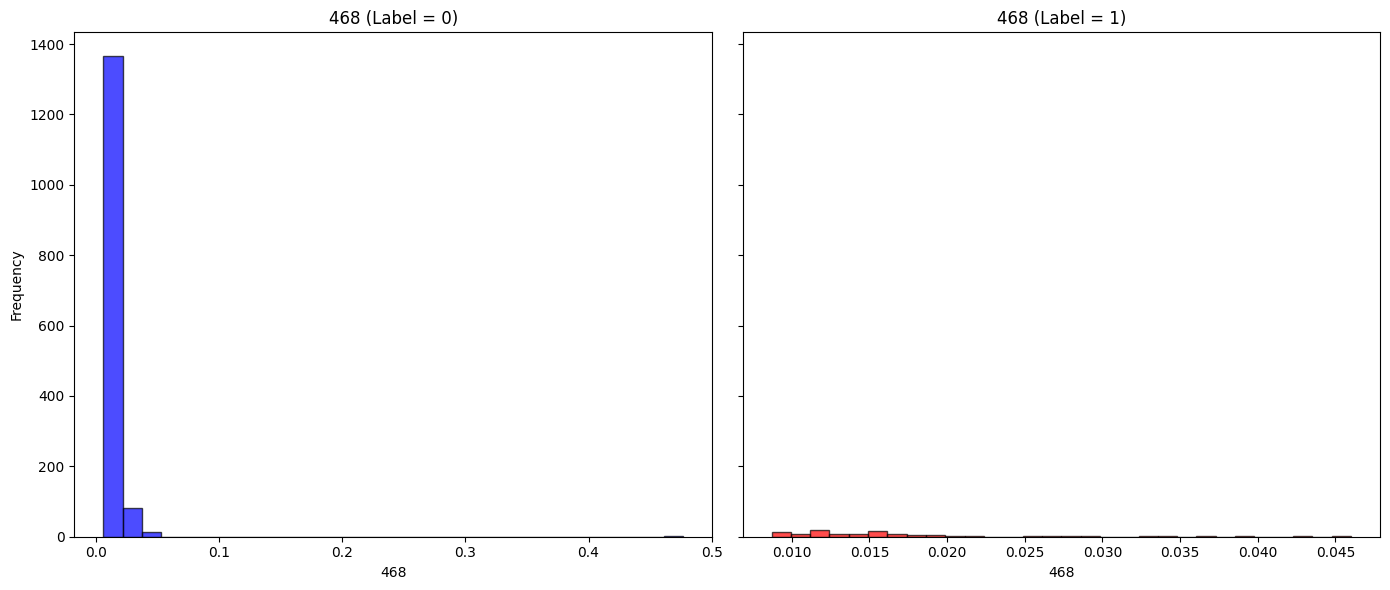

 Conditional Univariate Analysis for '148' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '148' by 'V475':

       count      mean      std     min      25%     50%       75%     max
V475                                                                      
0     1463.0  0.058043  0.08139  0.0111  0.03605  0.0488  0.066700  2.2016
1      104.0  0.058728  0.03578  0.0145  0.03795  0.0482  0.066925  0.2026


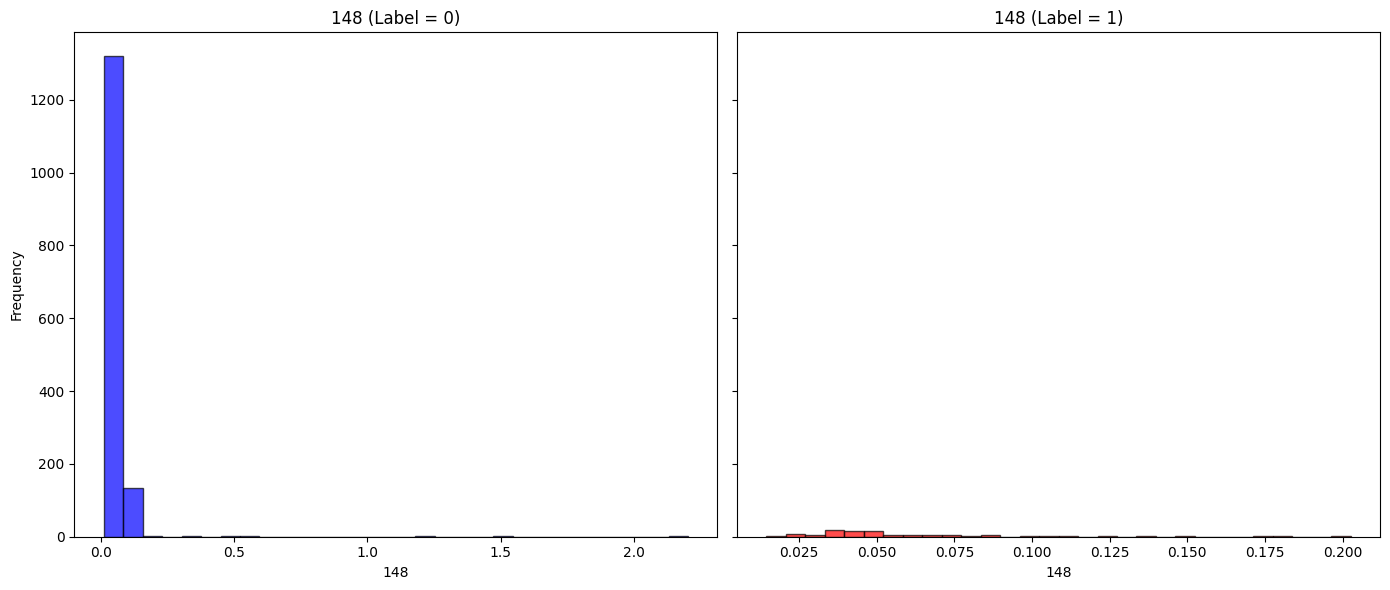

 Conditional Univariate Analysis for '257' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '257' by 'V475':

       count      mean       std     min     25%     50%      75%     max
V475                                                                     
0     1462.0  0.905926  0.309586  0.3100  0.7172  0.8588  1.04505  5.7110
1      103.0  0.970039  0.559664  0.3621  0.7281  0.8846  1.06445  5.3602


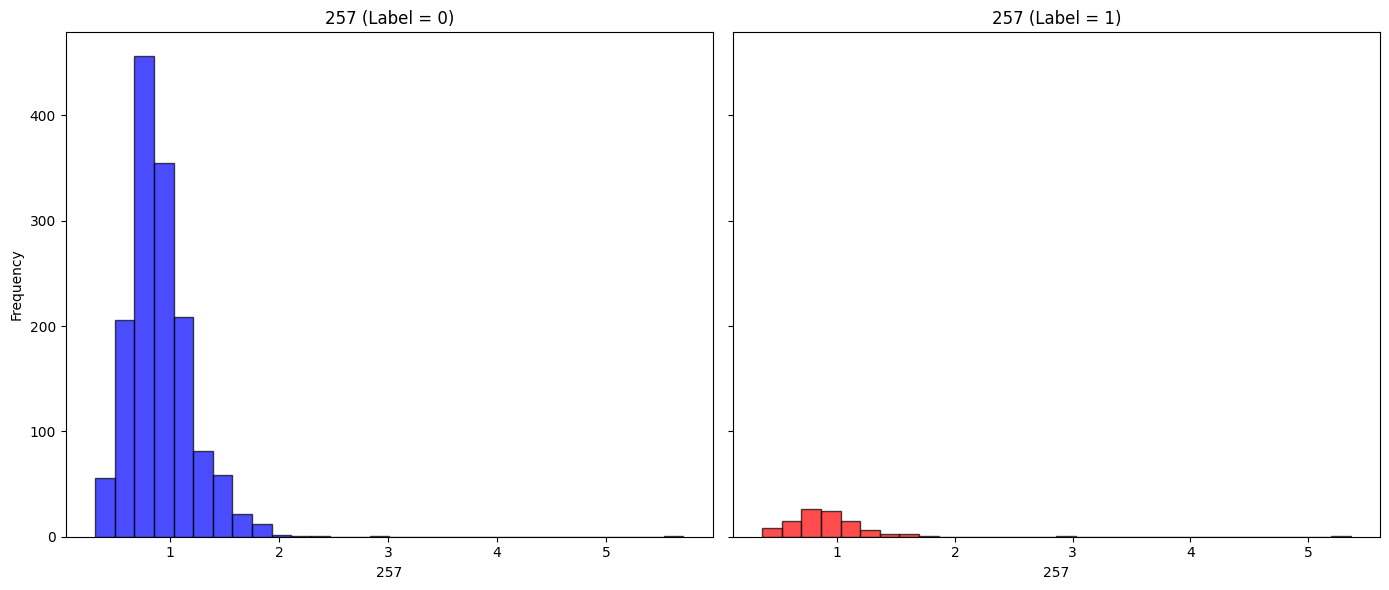

 Conditional Univariate Analysis for '12' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '12' by 'V475':

       count        mean       std      min         25%       50%         75%  \
V475                                                                            
0     1461.0  199.961995  3.299651  182.094  198.124100  199.5093  202.035200   
1      104.0  199.883958  2.601660  191.225  198.491475  199.7556  201.829275   

           max  
V475            
0     272.0451  
1     207.0302  


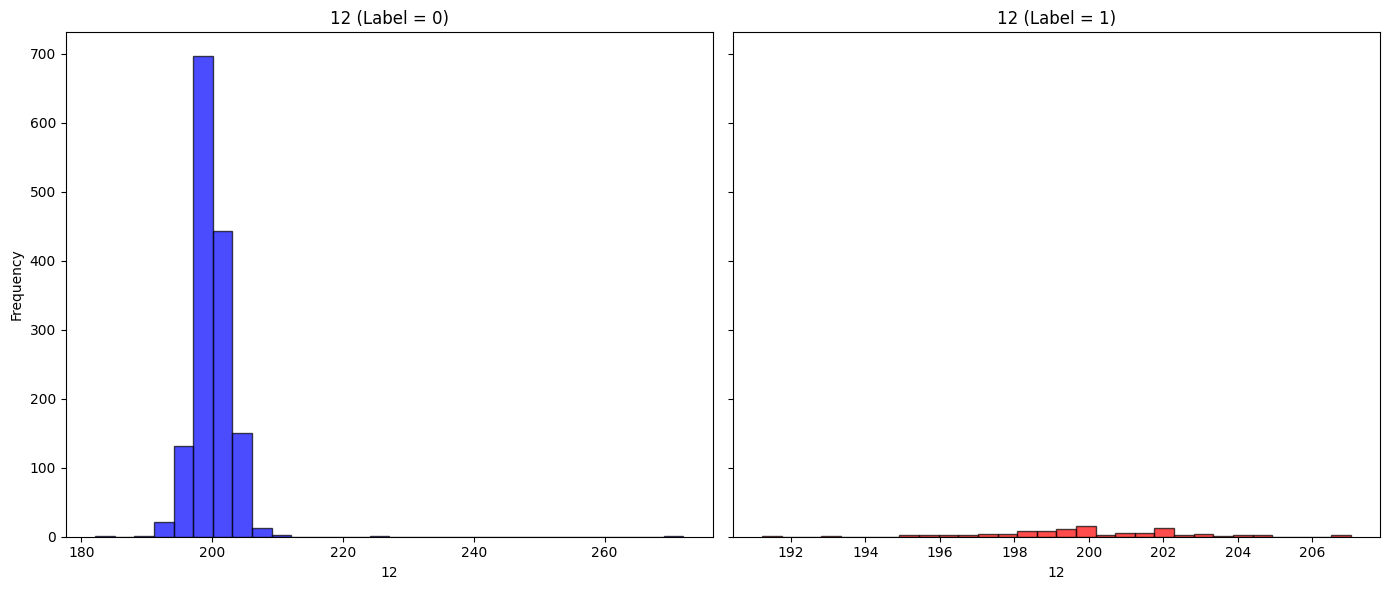

 Conditional Univariate Analysis for '454' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '454' by 'V475':

       count       mean        std     min      25%       50%        75%  \
V475                                                                       
0     1214.0  20.981064  10.009841  3.2504  15.4662  16.82240  24.652900   
1       80.0  23.190728  12.812820  3.3424  15.4662  19.21335  27.917075   

          max  
V475           
0     84.8024  
1     70.9311  


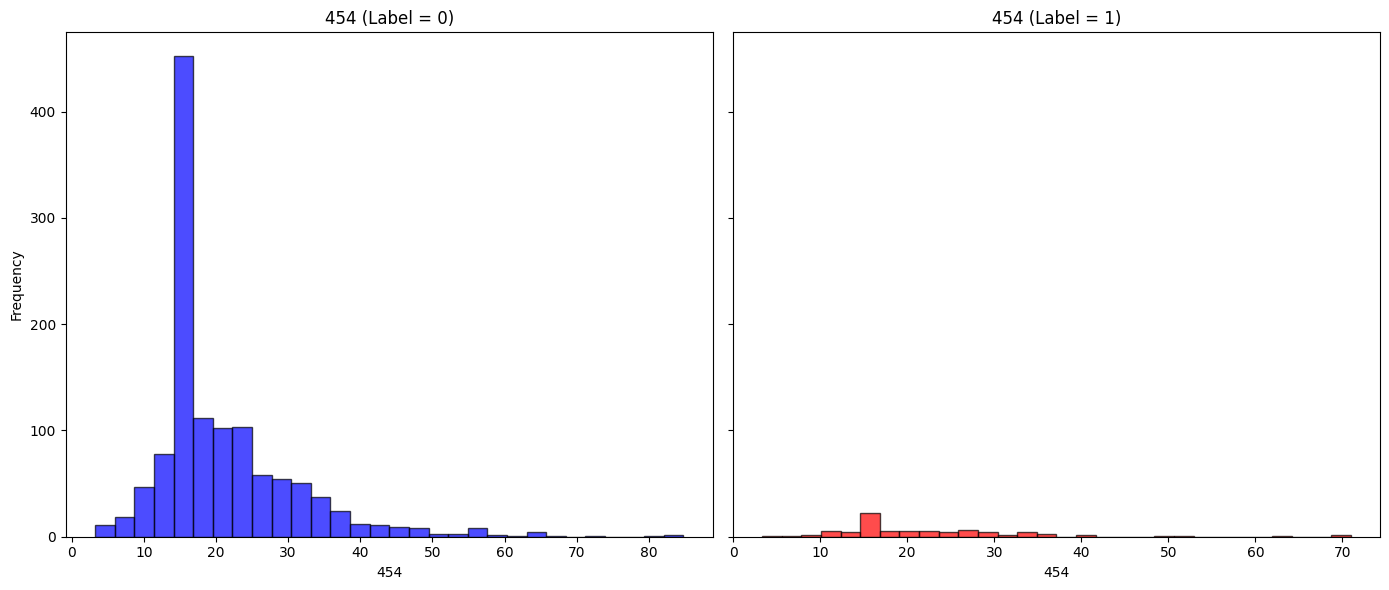

 Conditional Univariate Analysis for '65' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '65' by 'V475':

       count        mean       std       min         25%       50%       75%  \
V475                                                                           
0     1457.0  619.234221  9.508011  581.7773  612.820000  619.0991  625.2700   
1      104.0  617.244929  9.825745  582.4818  611.834525  617.3468  623.1614   

           max  
V475            
0     722.6018  
1     636.8255  


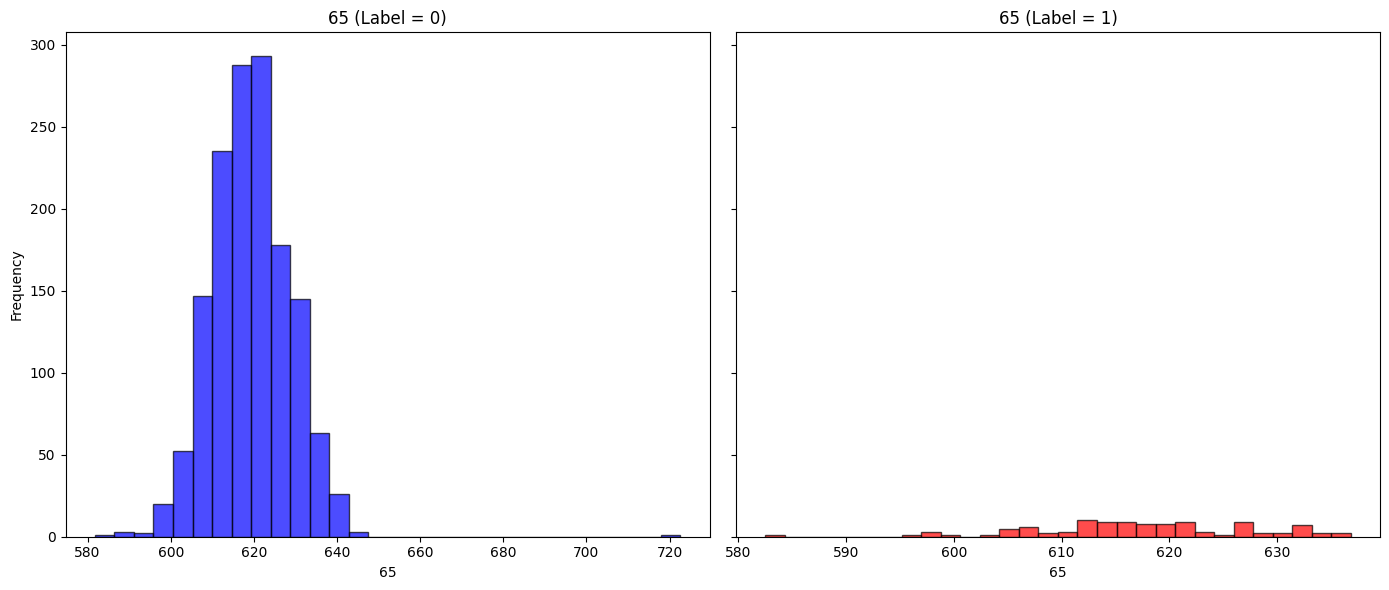

 Conditional Univariate Analysis for '350' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '350' by 'V475':

       count      mean       std     min      25%      50%      75%       max
V475                                                                         
0     1463.0  4.171371  6.625760  0.7837  2.56335  3.45390  4.75495  186.6164
1      104.0  4.178489  2.554056  1.0486  2.69510  3.42295  4.78525   14.6873


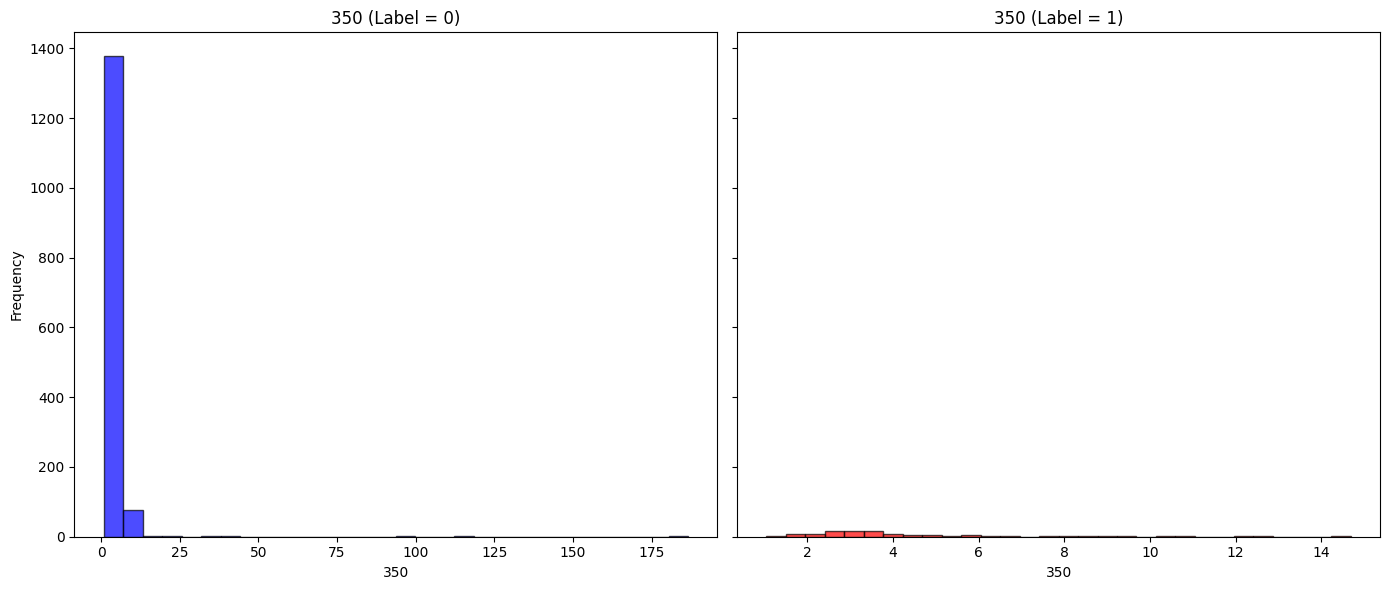

 Conditional Univariate Analysis for '40' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '40' by 'V475':

       count      mean       std     min     25%    50%    75%    max
V475                                                                 
0     1439.0  3.351492  2.425805 -0.0759  2.6940  3.074  3.483  37.88
1      104.0  3.374849  1.120906  0.9273  2.5365  3.093  4.019   6.25


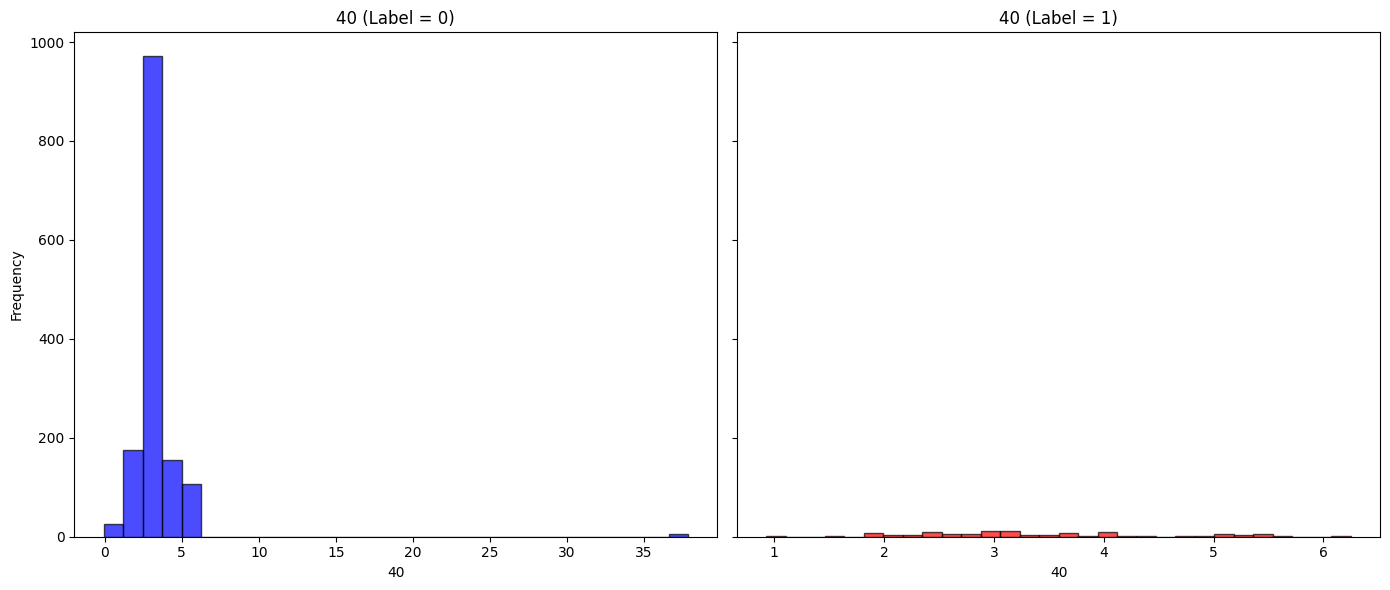

 Conditional Univariate Analysis for '204' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '204' by 'V475':

       count      mean       std     min      25%     50%       75%     max
V475                                                                       
0     1463.0  0.060583  0.022894  0.0200  0.04020  0.0610  0.076450  0.1879
1      104.0  0.062606  0.028539  0.0261  0.04155  0.0583  0.076825  0.2305


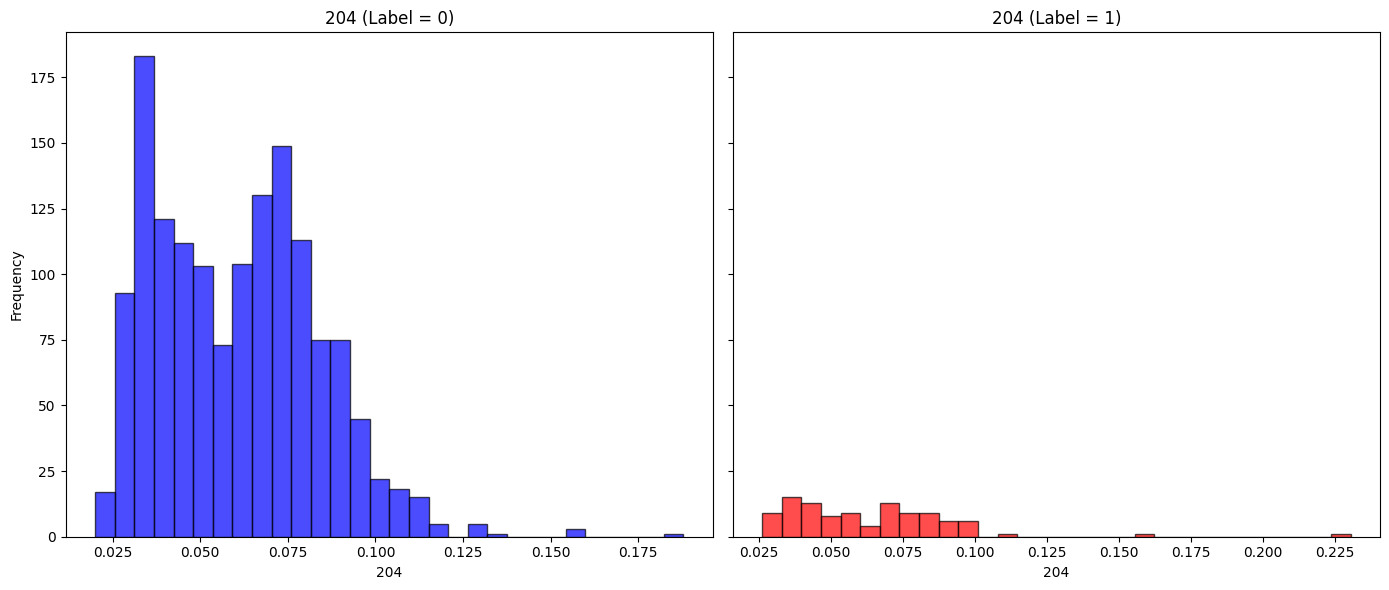

 Conditional Univariate Analysis for '15' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '15' by 'V475':

       count      mean       std     min      25%      50%      75%       max
V475                                                                         
0     1460.0  9.906092  2.483535  4.4696  9.56510  9.84715  10.1230  102.8677
1      104.0  9.928818  0.564531  8.0711  9.62965  9.90860  10.1964   12.1998


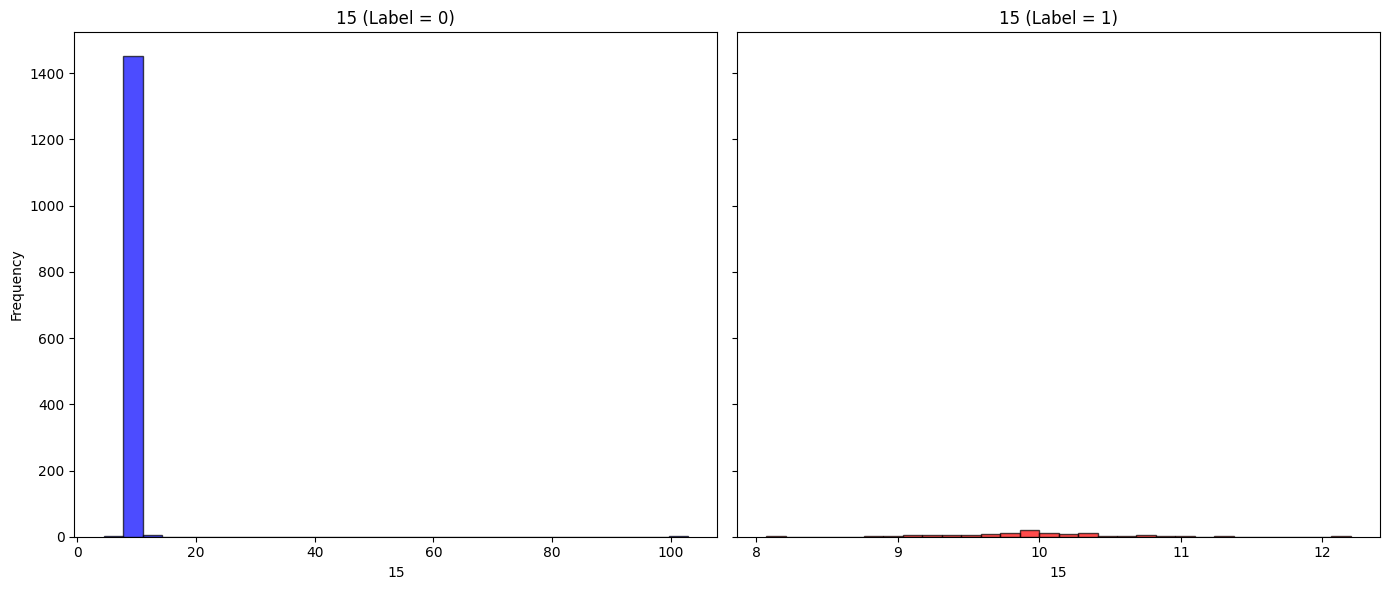

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

class ConditionalUnivariateAnalyzer:
    def __init__(self, data, label_col):
        self.data = data
        self.label_col = label_col

    def detect_type(self, col):
        if self.data[col].dtype == 'object' or self.data[col].nunique() < 15:
            return 'categorical'
        else:
            return 'numerical'

    def histogram_by_label(self, col):
        df0 = self.data[self.data[self.label_col] == 0][col]
        df1 = self.data[self.data[self.label_col] == 1][col]

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        axes[0].hist(df0.dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        axes[0].set_title(f"{col} (Label = 0)")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")

        axes[1].hist(df1.dropna(), bins=30, color='red', alpha=0.7, edgecolor='black')
        axes[1].set_title(f"{col} (Label = 1)")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

    def countplot_by_label(self, col):
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue=self.label_col, data=self.data, palette='Set2')
        plt.title(f"Countplot of {col} by {self.label_col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    def describe_by_label(self, col):
        print(f"\n Descriptive statistics for '{col}' by '{self.label_col}':\n")
        print(self.data.groupby(self.label_col)[col].describe())

    def run_all(self, col):
        print("=" * 60)
        print(f" Conditional Univariate Analysis for '{col}' by '{self.label_col}'")
        print("-" * 60)

        if col == self.label_col:
            print("Skipping label column itself.")
            return

        var_type = self.detect_type(col)
        print(f" Detected Type: {var_type.capitalize()}")

        self.describe_by_label(col)

        if var_type == 'categorical':
            self.countplot_by_label(col)
        else:
            self.histogram_by_label(col)

        print("=" * 60)

# Assuming df is your DataFrame and 'V475' is your binary label
eda = ConditionalUnivariateAnalyzer( filtered_df, label_col="V475")

# Run EDA for each column
for column in filtered_df.columns:
    eda.run_all(column)
    

 Conditional Univariate Analysis for 'V475' by 'V475'
------------------------------------------------------------
 Skipping label column itself.
 Conditional Univariate Analysis for '55' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '55' by 'V475':

       count      mean        std      min      25%      50%        75%  \
V475                                                                      
0     1456.0  2.563464   9.313121 -28.9882 -1.97000  0.72225   3.897975   
1      104.0  8.515123  10.802344 -12.1527  1.05295  5.52230  15.468650   

           max  
V475            
0     168.1455  
1      53.6818  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


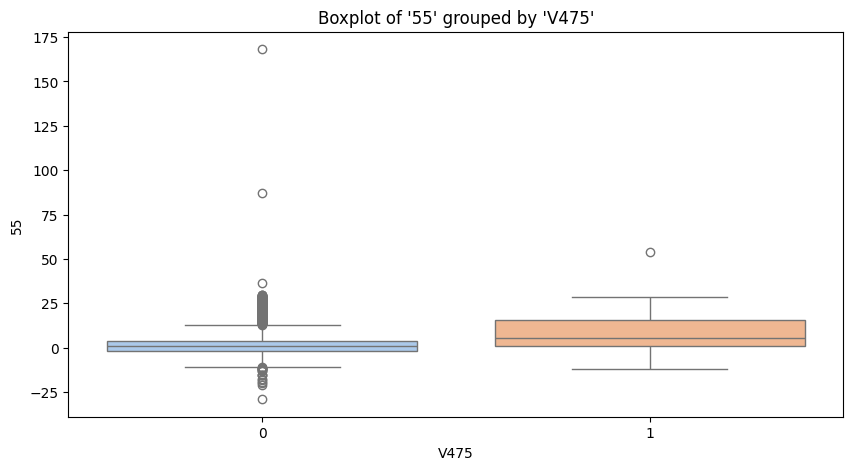

 Conditional Univariate Analysis for '60' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '60' by 'V475':

       count       mean       std     min        25%       50%        75%  \
V475                                                                        
0     1456.0  20.440291  4.729375  8.5145  17.401800  20.01185  22.664075   
1      104.0  21.967568  7.538980  6.4482  16.567275  20.85955  26.265250   

          max  
V475           
0     48.9882  
1     42.6300  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


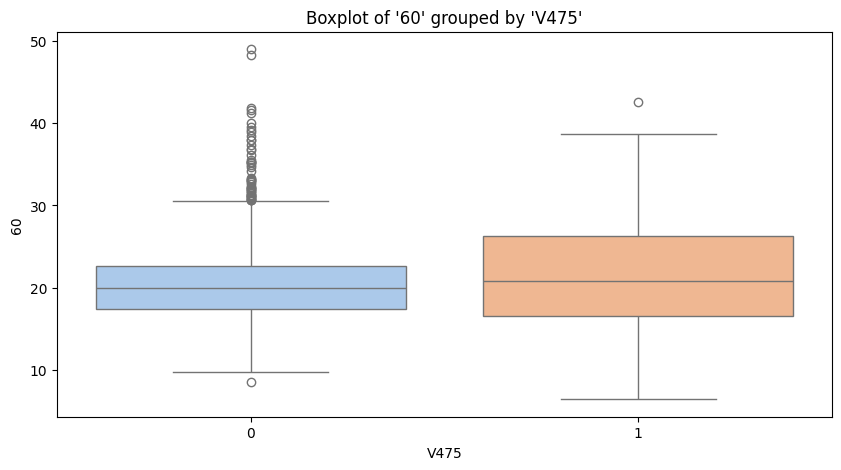

 Conditional Univariate Analysis for '447' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '447' by 'V475':

       count        mean       std      min       25%      50%      75%  \
V475                                                                      
0     1214.0  262.825563  7.564183  242.534  259.9580  264.272  265.812   
1       80.0  261.274700  8.495291  242.286  260.2505  264.272  265.149   

          max  
V475           
0     311.404  
1     279.470  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


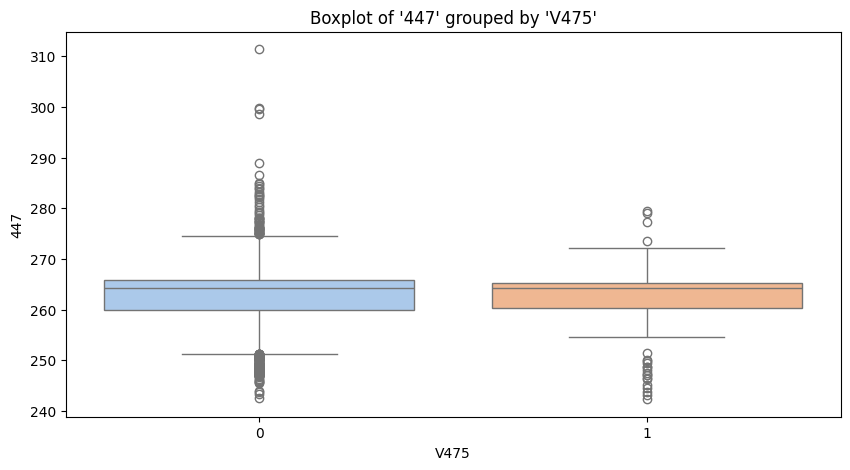

 Conditional Univariate Analysis for '61' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '61' by 'V475':

       count       mean       std     min       25%       50%       75%  \
V475                                                                      
0     1456.0  27.027496  6.951183  4.3080  23.15560  26.21745  29.78525   
1      104.0  28.592296  9.099575  8.7636  21.97175  27.97485  33.53480   

           max  
V475            
0     118.0836  
1      56.8964  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


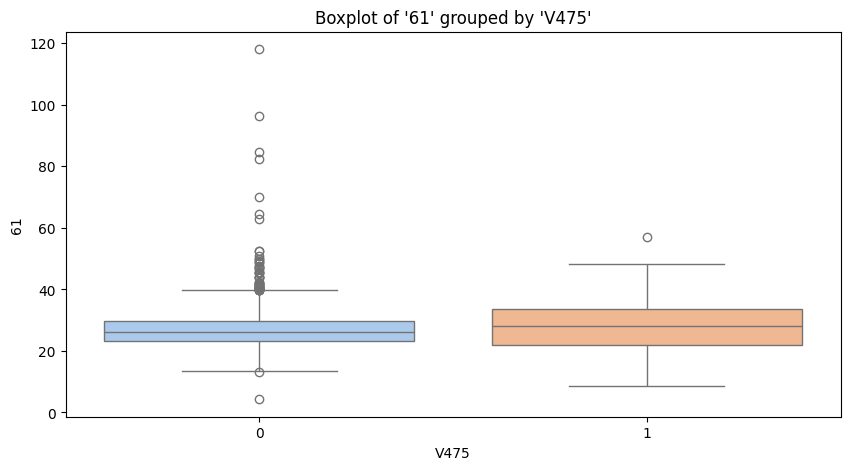

 Conditional Univariate Analysis for '347' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '347' by 'V475':

       count      mean       std     min       25%     50%       75%      max
V475                                                                         
0     1460.0  1.228399  1.011117  0.3813  0.747675  1.1258  1.518375  24.9904
1      104.0  1.310484  0.744331  0.3632  0.662975  1.3010  1.706025   6.0108


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


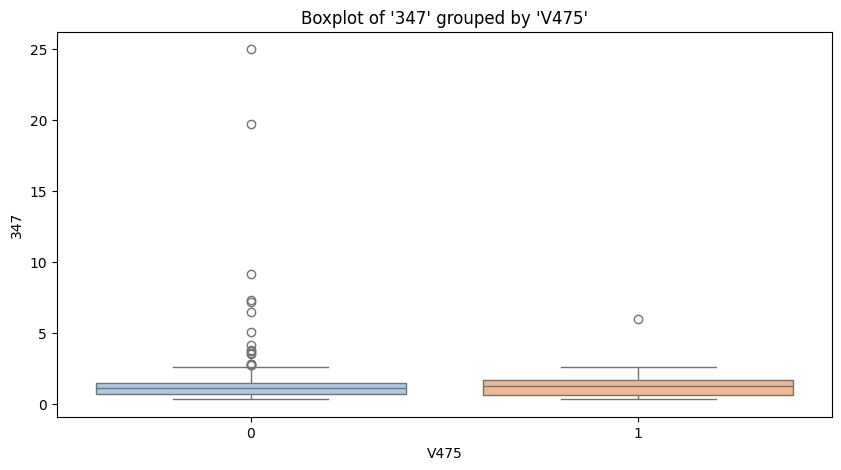

 Conditional Univariate Analysis for '39' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '39' by 'V475':

       count       mean        std    min      25%     50%     75%    max
V475                                                                     
0     1439.0  68.239842  23.846582  1.434  75.3400  78.330  80.265  86.12
1      104.0  63.270606  26.572767  2.332  64.9375  77.105  79.235  84.98


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


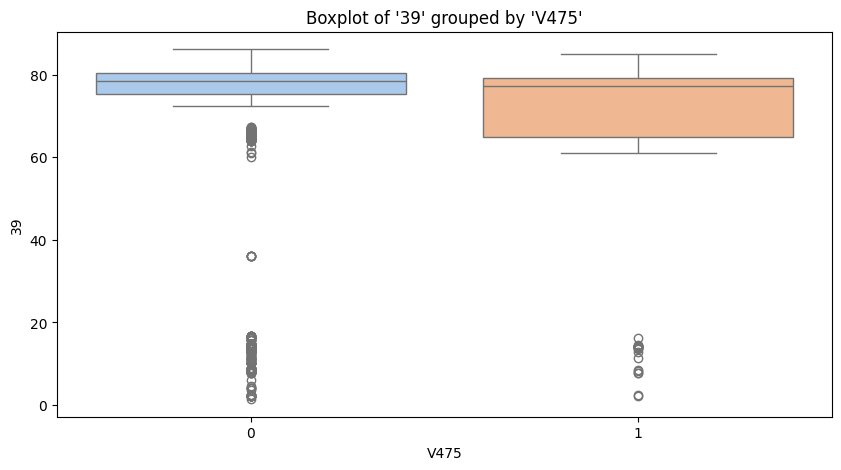

 Conditional Univariate Analysis for '287' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '287' by 'V475':

       count      mean       std     min       25%    50%       75%      max
V475                                                                        
0     1457.0  2.683376  3.557541  0.5741  1.895700  2.360  2.946100  97.7089
1      104.0  3.414611  4.934798  0.9517  2.014525  2.721  3.648925  51.7929


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


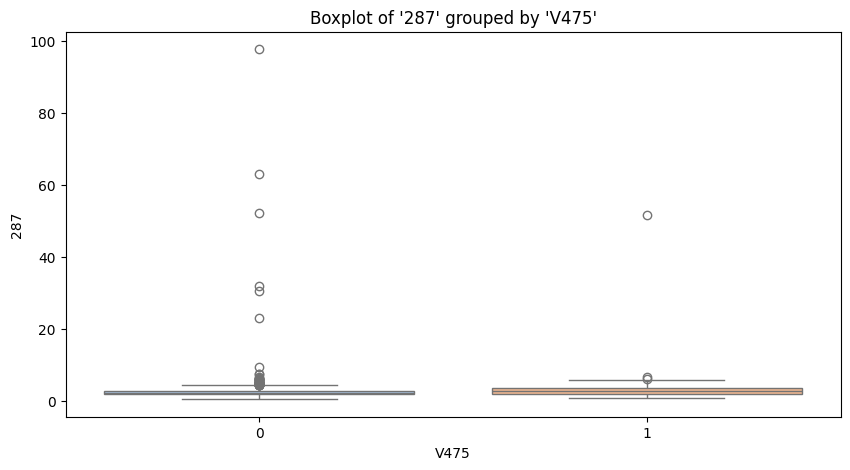

 Conditional Univariate Analysis for '294' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '294' by 'V475':

       count      mean       std     min      25%     50%       75%     max
V475                                                                       
0     1439.0  0.024291  0.010346  0.0103  0.01800  0.0225  0.027150  0.1251
1      104.0  0.030448  0.024014  0.0105  0.02075  0.0246  0.037025  0.2200


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


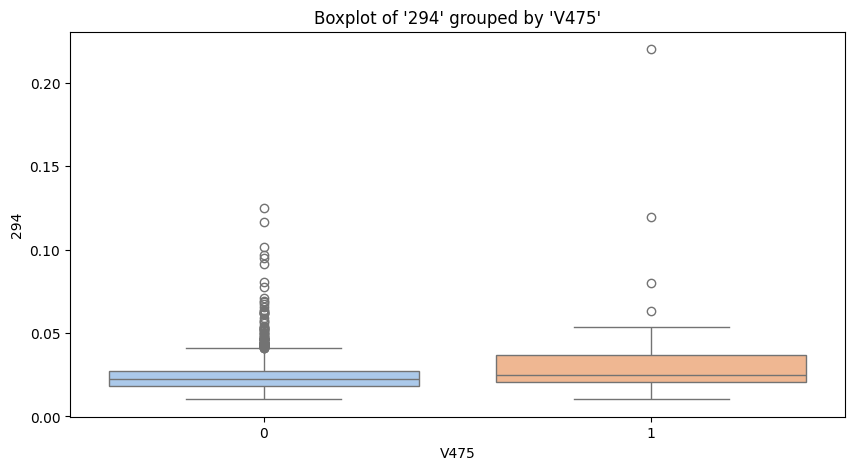

 Conditional Univariate Analysis for '225' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '225' by 'V475':

       count      mean       std     min     25%      50%       75%     max
V475                                                                       
0     1455.0  0.070705  0.029434  0.0198  0.0440  0.07110  0.091650  0.1578
1      104.0  0.068933  0.032613  0.0198  0.0356  0.06915  0.091625  0.1578


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


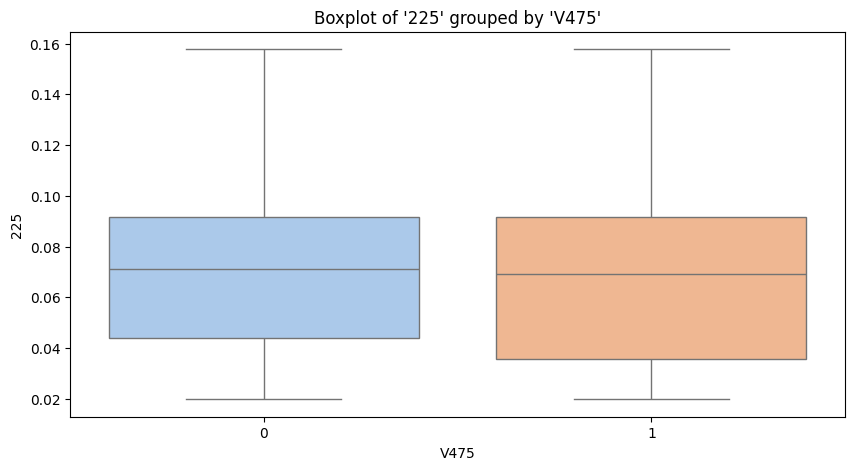

 Conditional Univariate Analysis for '20' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '20' by 'V475':

       count         mean         std      min       25%      50%        75%  \
V475                                                                           
0     1462.0 -5636.437585  593.798769 -7148.00 -5971.250 -5529.00 -5361.5625   
1      103.0 -5362.274272  950.378454 -7150.25 -5639.125 -5447.25 -5267.7500   

          max  
V475           
0        0.00  
1    -1368.75  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


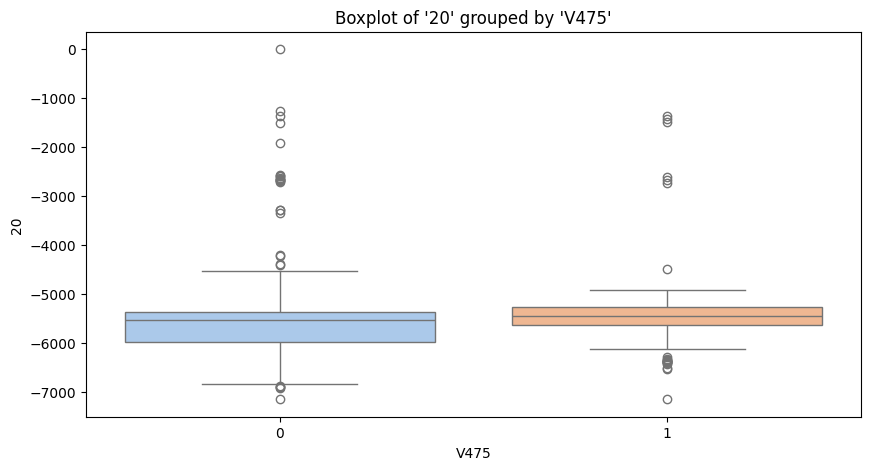

 Conditional Univariate Analysis for '158' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '158' by 'V475':

       count      mean       std  min  25%  50%   75%   max
V475                                                       
0     1462.0  2.773324  1.007949  0.8  2.1  2.6  3.20  18.9
1      103.0  3.009709  2.149624  1.2  2.1  2.7  3.25  21.1


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


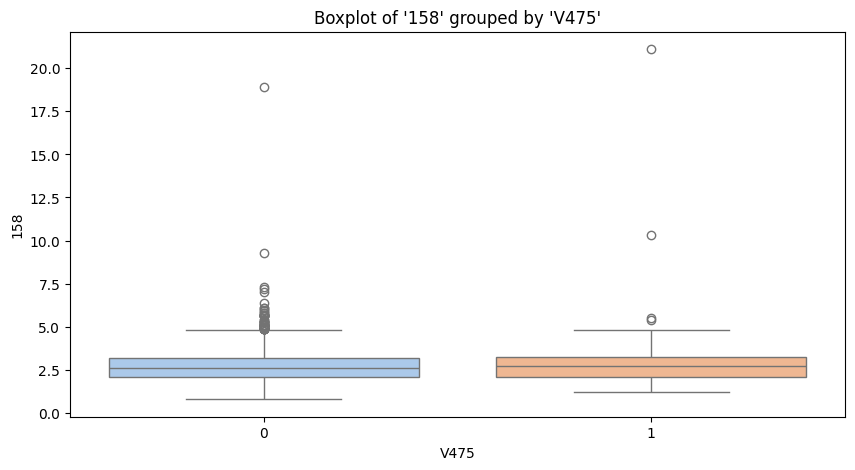

 Conditional Univariate Analysis for '439' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '439' by 'V475':



C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


       count      mean       std     min      25%      50%      75%      max
V475                                                                        
0     1221.0  0.493477  0.523449  0.0520  0.34350  0.47670  0.56070  17.4781
1       86.0  0.648198  1.246930  0.0991  0.35445  0.49805  0.60435  11.1600


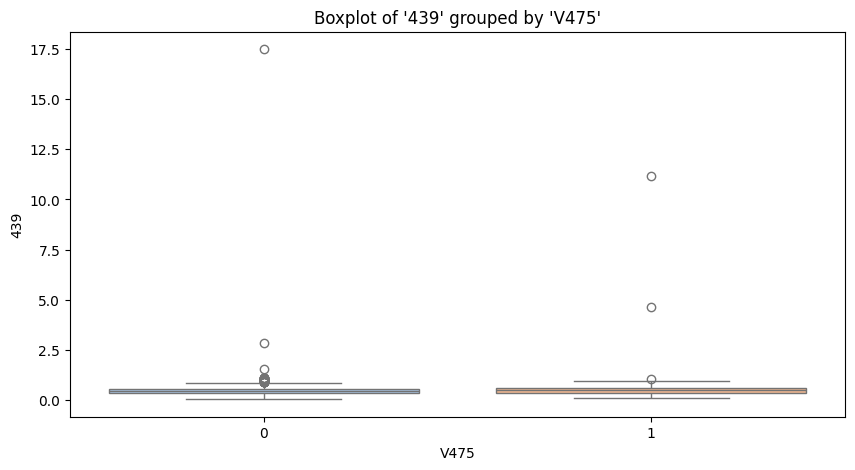

 Conditional Univariate Analysis for '145' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '145' by 'V475':

       count      mean       std     min     25%      50%      75%     max
V475                                                                      
0     1460.0  0.011872  0.009483  0.0037  0.0073  0.01090  0.01470  0.2389
1      104.0  0.012687  0.007138  0.0036  0.0065  0.01265  0.01655  0.0580


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


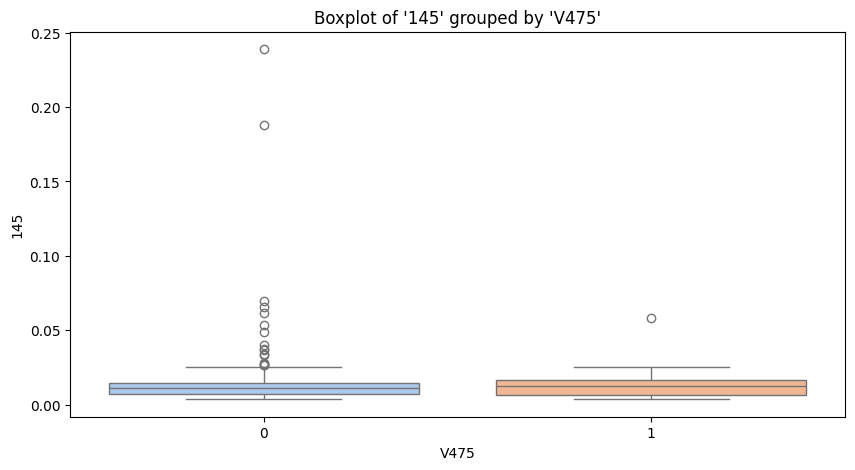

 Conditional Univariate Analysis for '277' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '277' by 'V475':

       count      mean       std     min      25%     50%      75%     max
V475                                                                      
0     1460.0  0.082645  0.061572  0.0224  0.06850  0.0845  0.09560  1.0959
1      103.0  0.091552  0.085434  0.0224  0.07725  0.0867  0.09685  0.6813


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


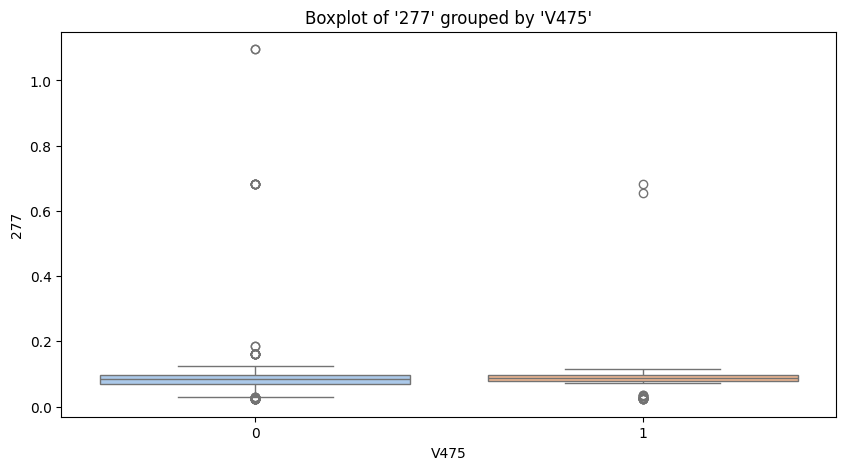

 Conditional Univariate Analysis for '3' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '3' by 'V475':

       count         mean        std        min          25%        50%  \
V475                                                                      
0     1449.0  2200.554886  29.391944  2060.6600  2181.188900  2201.0667   
1      104.0  2200.441877  31.302444  2138.8778  2173.480575  2196.6889   

              75%        max  
V475                          
0     2218.055500  2315.2667  
1     2218.936075  2315.2667  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


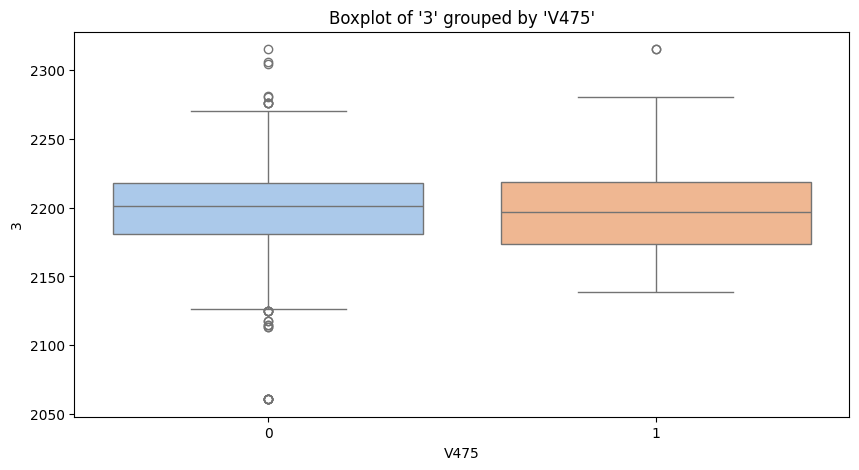

 Conditional Univariate Analysis for '66' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '66' by 'V475':

       count        mean        std      min       25%       50%       75%  \
V475                                                                         
0     1457.0  104.346280  31.196791  21.4332  87.71660  102.6512  115.7673   
1      104.0  104.087421  37.627584  21.8203  83.47295  100.6563  112.2129   

           max  
V475            
0     238.4775  
1     233.6113  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


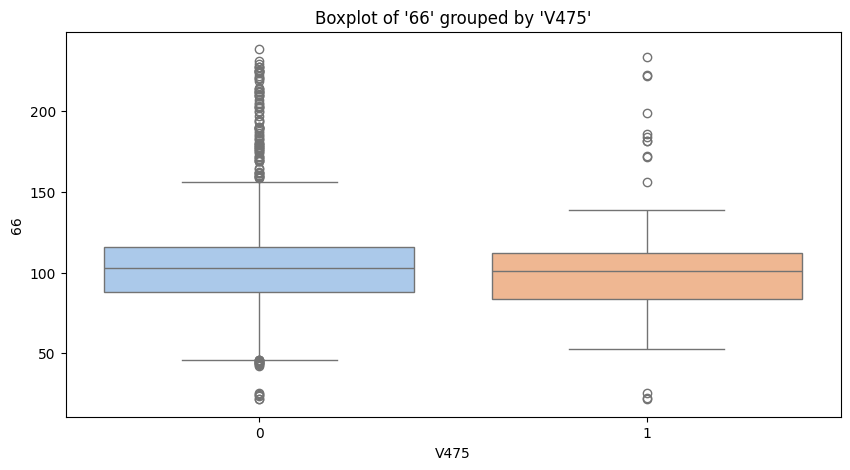

 Conditional Univariate Analysis for '24' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '24' by 'V475':

       count      mean       std     min       25%     50%      75%     max
V475                                                                       
0     1462.0  1.205567  0.170752  0.0000  1.093275  1.2833  1.30400  1.3745
1      103.0  1.179400  0.255687  0.2253  1.254850  1.2813  1.30645  1.3828


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


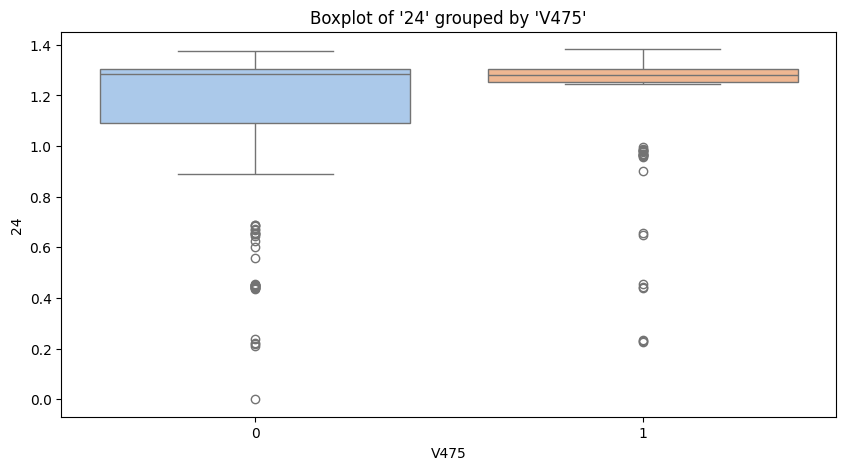

 Conditional Univariate Analysis for '388' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '388' by 'V475':

       count      mean        std     min       25%     50%       75%  \
V475                                                                    
0     1457.0  6.105094   9.556340  1.6872  4.072900  5.1912  6.583600   
1      104.0  8.398982  16.589919  2.0751  4.406375  6.1204  8.602725   

           max  
V475            
0     289.8264  
1     173.3631  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


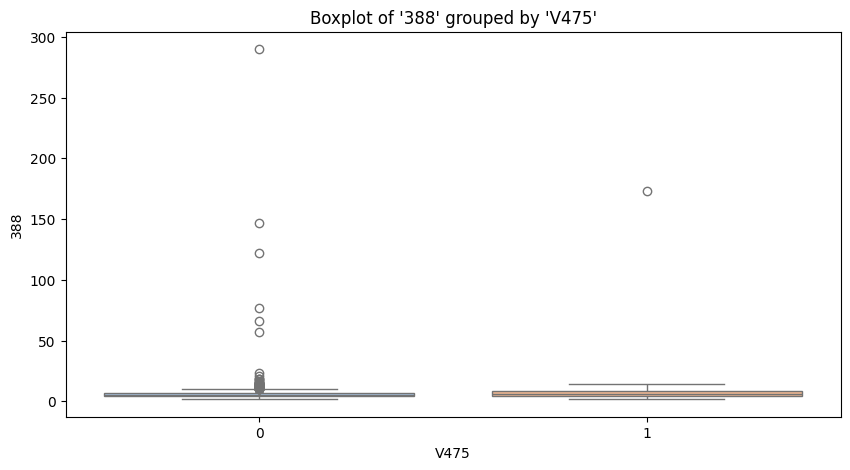

 Conditional Univariate Analysis for '126' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '126' by 'V475':

       count      mean       std     min       25%     50%       75%     max
V475                                                                        
0     1455.0  2.318539  0.052749  2.1911  2.277300  2.3122  2.357300  2.4723
1      104.0  2.318617  0.059173  2.1911  2.276925  2.3236  2.367775  2.4244


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


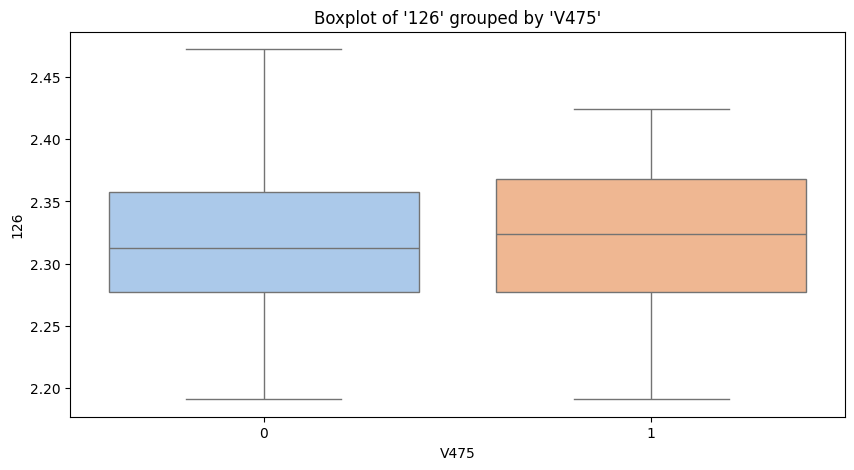

 Conditional Univariate Analysis for '469' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '469' by 'V475':

       count      mean       std     min     25%     50%     75%     max
V475                                                                    
0     1462.0  0.003841  0.003833  0.0017  0.0031  0.0036  0.0041  0.1045
1      104.0  0.003922  0.001400  0.0022  0.0030  0.0037  0.0042  0.0097


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


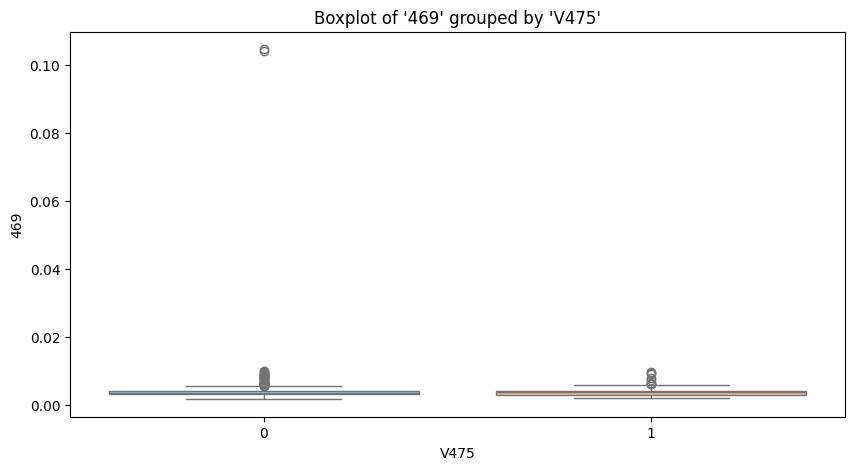

 Conditional Univariate Analysis for '188' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '188' by 'V475':

       count       mean        std  min  25%   50%     75%     max
V475                                                              
0     1457.0   8.884743  11.290640  2.3  6.0  7.66   9.790  320.05
1      104.0  11.367019  14.474547  3.1  6.6  9.16  12.815  150.87


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


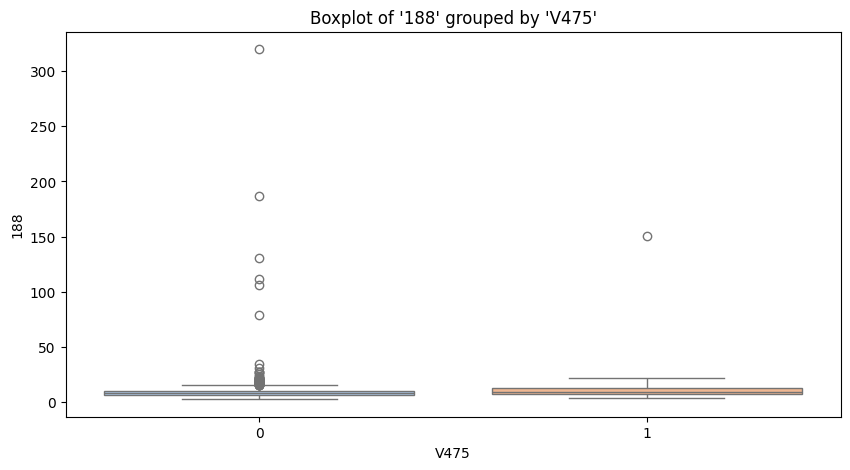

 Conditional Univariate Analysis for '78' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '78' by 'V475':

       count      mean       std     min       25%     50%       75%     max
V475                                                                        
0     1462.0  7.455438  0.514376  5.8257  7.106775  7.4792  7.809500  8.9904
1      104.0  7.404669  0.542300  5.9468  7.096250  7.3836  7.693775  8.8710


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


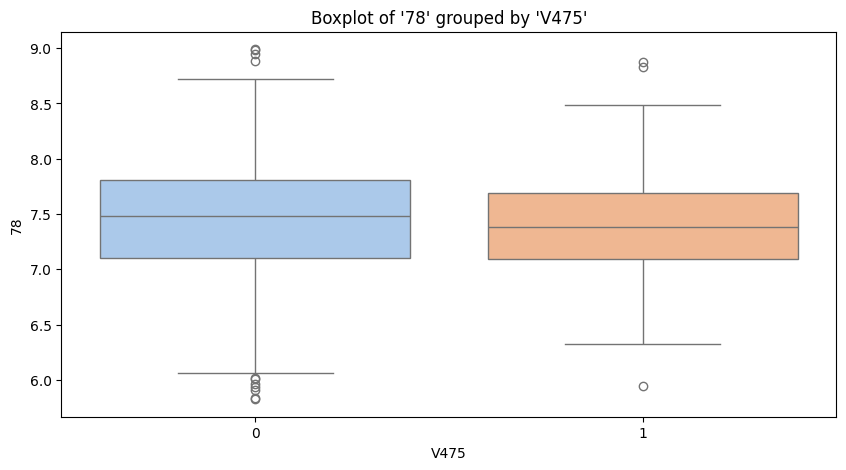

 Conditional Univariate Analysis for '21' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '21' by 'V475':

       count         mean         std    min      25%      50%      75%  \
V475                                                                      
0     1462.0  2705.158174  279.780022    0.0  2578.25  2665.25  2851.75   
1      103.0  2617.339806  458.716872  609.5  2561.50  2635.75  2756.00   

          max  
V475           
0     3656.25  
1     3493.75  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


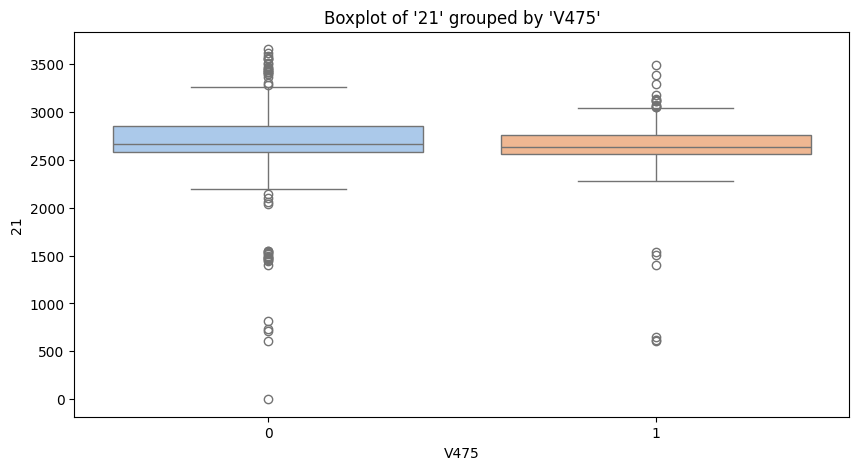

 Conditional Univariate Analysis for '59' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '59' by 'V475':

       count       mean       std     min        25%      50%       75%  \
V475                                                                      
0     1456.0  13.875941  7.067502  1.6591  10.349075  13.2255  16.24335   
1      104.0  15.585730  7.676164  3.7778  10.651125  13.4103  18.05980   

           max  
V475            
0     188.0923  
1      53.9451  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


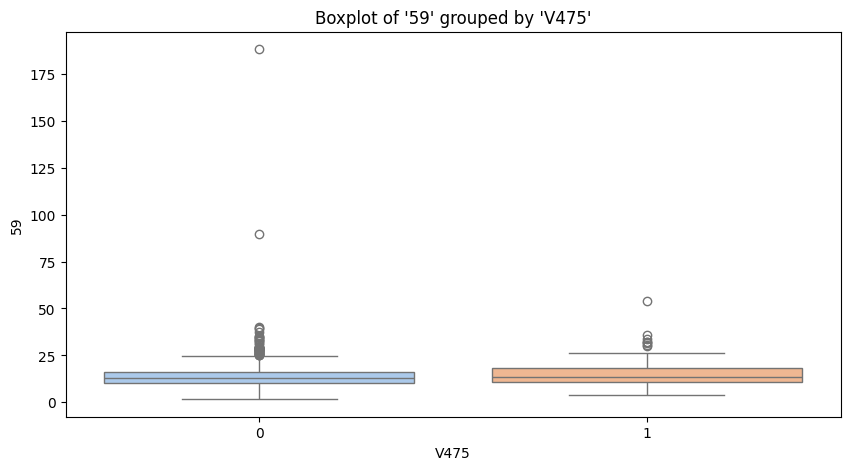

 Conditional Univariate Analysis for '193' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '193' by 'V475':

       count      mean       std     min      25%      50%       75%     max
V475                                                                        
0     1439.0  0.087707  0.039025  0.0319  0.06535  0.07900  0.098250  0.4590
1      104.0  0.104906  0.070351  0.0339  0.06855  0.08555  0.123475  0.5164


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


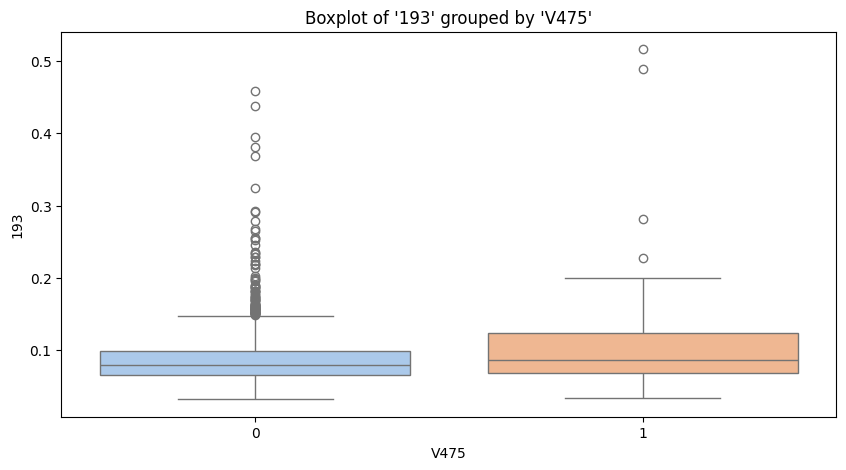

 Conditional Univariate Analysis for '48' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '48' by 'V475':

       count        mean        std      min        25%       50%         75%  \
V475                                                                            
0     1462.0  157.323447  60.659297  40.7874  115.63560  182.2799  206.960800   
1      104.0  158.792243  64.840525  40.2614  111.34825  193.0888  207.442825   

           max  
V475            
0     258.5432  
1     239.4934  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


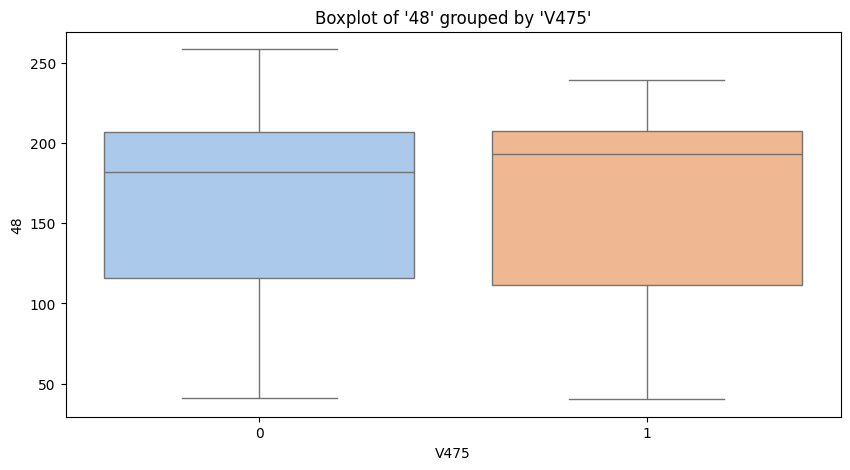

 Conditional Univariate Analysis for '296' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '296' by 'V475':

       count      mean       std     min       25%      50%       75%     max
V475                                                                         
0     1439.0  0.023190  0.014459  0.0029  0.014600  0.01880  0.028400  0.2914
1      104.0  0.023369  0.012393  0.0043  0.014175  0.01895  0.030675  0.0673


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


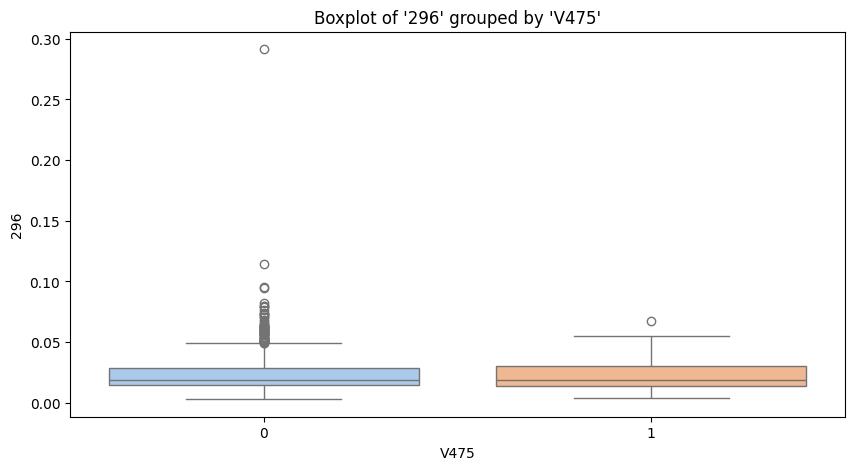

 Conditional Univariate Analysis for '419' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '419' by 'V475':

       count      mean       std     min      25%     50%       75%       max
V475                                                                         
0     1463.0  0.465395  4.288530  0.0258  0.07365  0.1001  0.133700  111.3330
1      104.0  0.292142  0.680726  0.0258  0.06945  0.0926  0.127025    4.0213


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


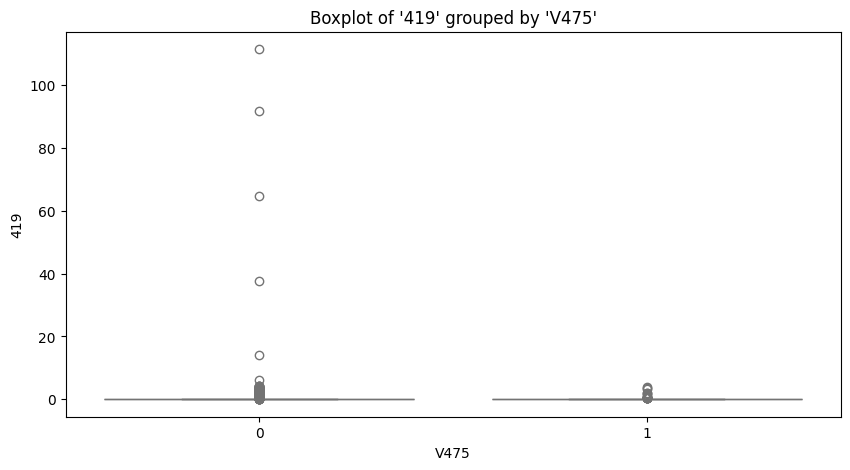

 Conditional Univariate Analysis for '144' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '144' by 'V475':

       count      mean        std     min      25%     50%       75%       max
V475                                                                          
0     1460.0  1.225472  24.181141  0.1609  0.37165  0.4656  0.659550  924.3780
1      104.0  0.793280   0.846763  0.1544  0.39485  0.5216  0.943725    5.8658


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


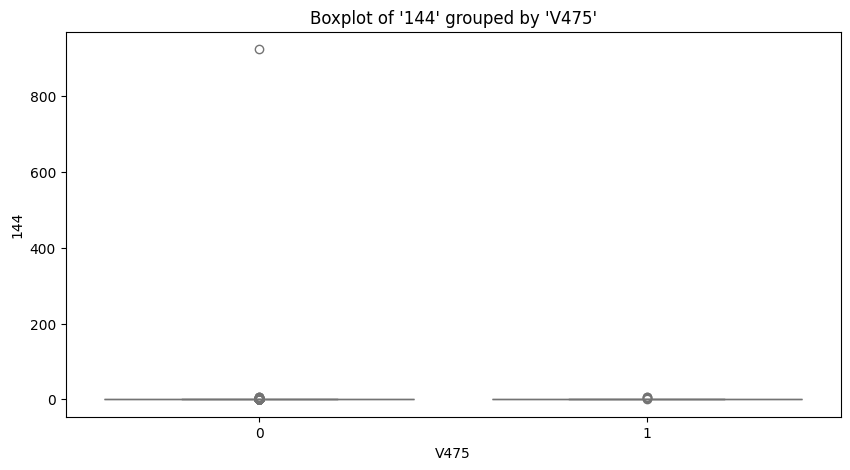

 Conditional Univariate Analysis for '468' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '468' by 'V475':

       count      mean       std     min     25%     50%       75%     max
V475                                                                      
0     1462.0  0.015290  0.017682  0.0060  0.0116  0.0138  0.016400  0.4766
1      104.0  0.015703  0.007046  0.0087  0.0115  0.0138  0.017025  0.0460


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


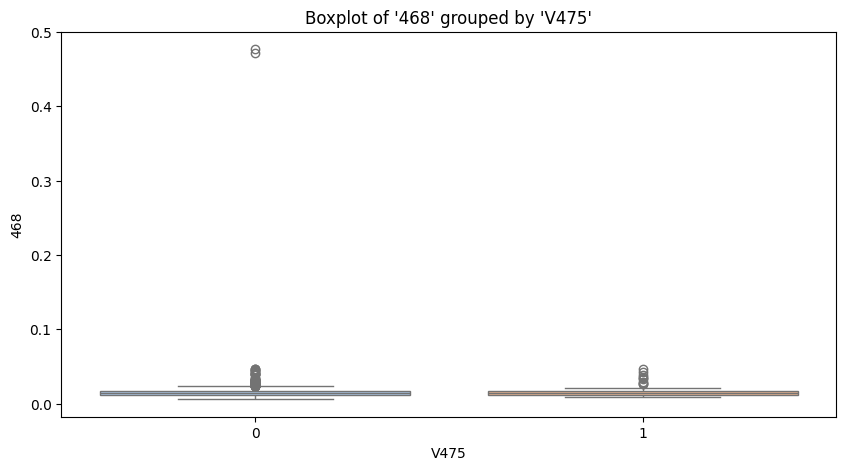

 Conditional Univariate Analysis for '148' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '148' by 'V475':

       count      mean      std     min      25%     50%       75%     max
V475                                                                      
0     1463.0  0.058043  0.08139  0.0111  0.03605  0.0488  0.066700  2.2016
1      104.0  0.058728  0.03578  0.0145  0.03795  0.0482  0.066925  0.2026


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


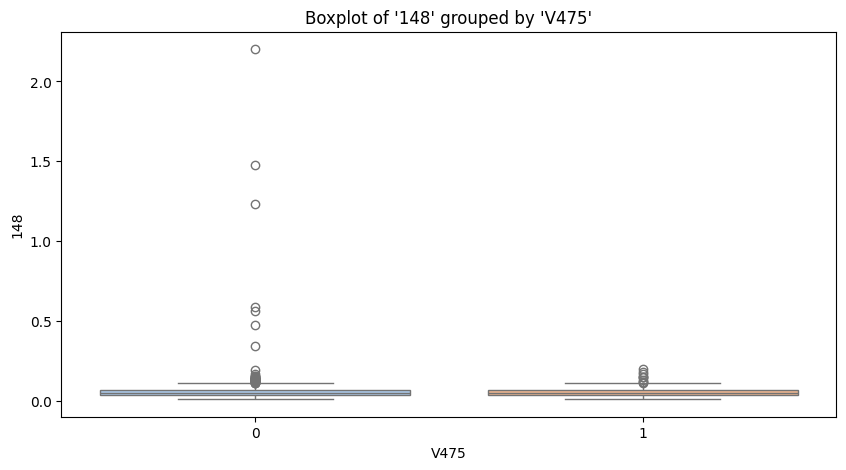

 Conditional Univariate Analysis for '257' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '257' by 'V475':

       count      mean       std     min     25%     50%      75%     max
V475                                                                     
0     1462.0  0.905926  0.309586  0.3100  0.7172  0.8588  1.04505  5.7110
1      103.0  0.970039  0.559664  0.3621  0.7281  0.8846  1.06445  5.3602


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


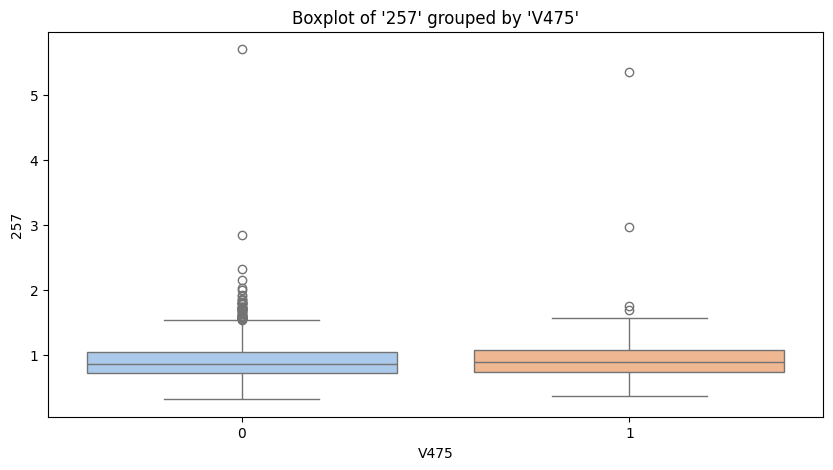

 Conditional Univariate Analysis for '12' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '12' by 'V475':

       count        mean       std      min         25%       50%         75%  \
V475                                                                            
0     1461.0  199.961995  3.299651  182.094  198.124100  199.5093  202.035200   
1      104.0  199.883958  2.601660  191.225  198.491475  199.7556  201.829275   

           max  
V475            
0     272.0451  
1     207.0302  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


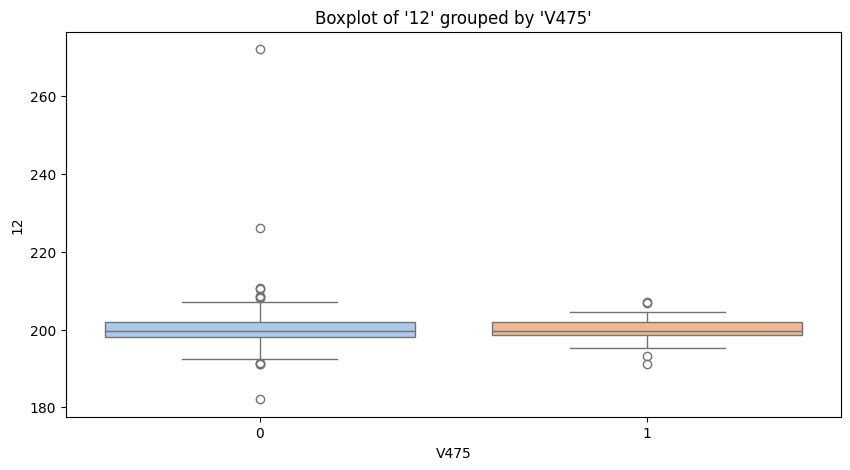

 Conditional Univariate Analysis for '454' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '454' by 'V475':

       count       mean        std     min      25%       50%        75%  \
V475                                                                       
0     1214.0  20.981064  10.009841  3.2504  15.4662  16.82240  24.652900   
1       80.0  23.190728  12.812820  3.3424  15.4662  19.21335  27.917075   

          max  
V475           
0     84.8024  
1     70.9311  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


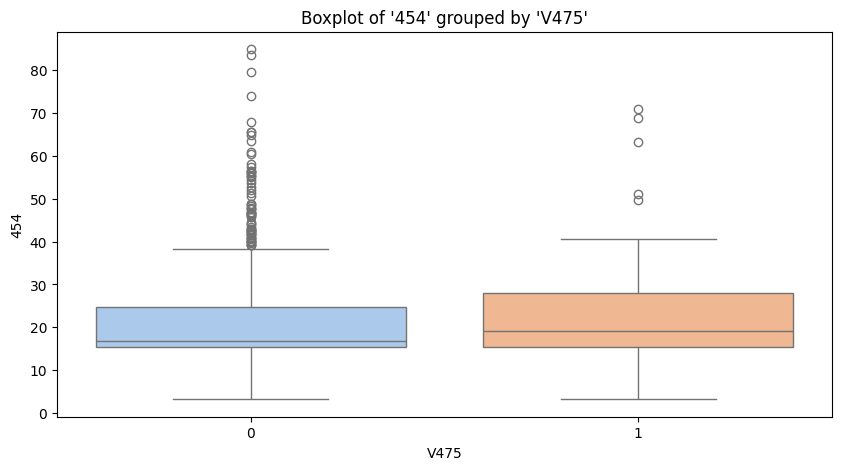

 Conditional Univariate Analysis for '65' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '65' by 'V475':

       count        mean       std       min         25%       50%       75%  \
V475                                                                           
0     1457.0  619.234221  9.508011  581.7773  612.820000  619.0991  625.2700   
1      104.0  617.244929  9.825745  582.4818  611.834525  617.3468  623.1614   

           max  
V475            
0     722.6018  
1     636.8255  


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


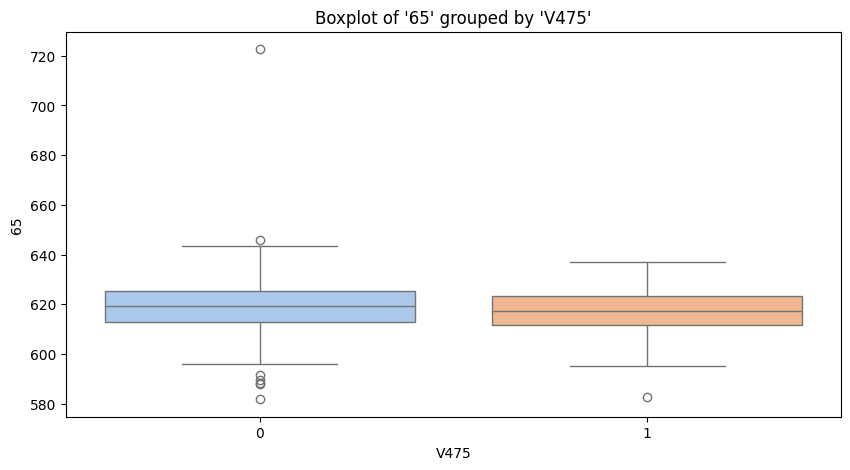

 Conditional Univariate Analysis for '350' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '350' by 'V475':

       count      mean       std     min      25%      50%      75%       max
V475                                                                         
0     1463.0  4.171371  6.625760  0.7837  2.56335  3.45390  4.75495  186.6164
1      104.0  4.178489  2.554056  1.0486  2.69510  3.42295  4.78525   14.6873


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


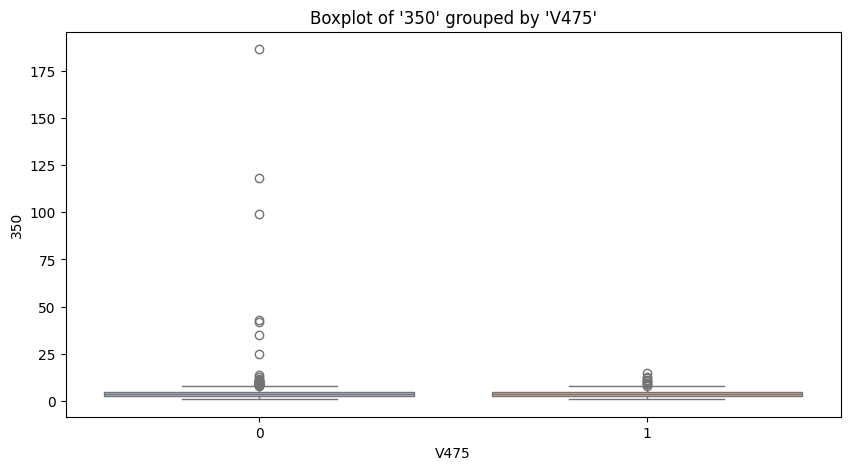

 Conditional Univariate Analysis for '40' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '40' by 'V475':

       count      mean       std     min     25%    50%    75%    max
V475                                                                 
0     1439.0  3.351492  2.425805 -0.0759  2.6940  3.074  3.483  37.88
1      104.0  3.374849  1.120906  0.9273  2.5365  3.093  4.019   6.25


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


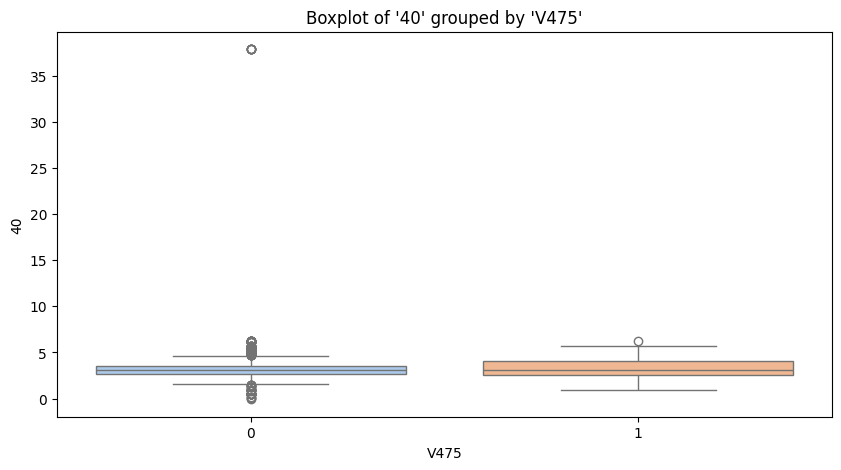

 Conditional Univariate Analysis for '204' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '204' by 'V475':

       count      mean       std     min      25%     50%       75%     max
V475                                                                       
0     1463.0  0.060583  0.022894  0.0200  0.04020  0.0610  0.076450  0.1879
1      104.0  0.062606  0.028539  0.0261  0.04155  0.0583  0.076825  0.2305


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


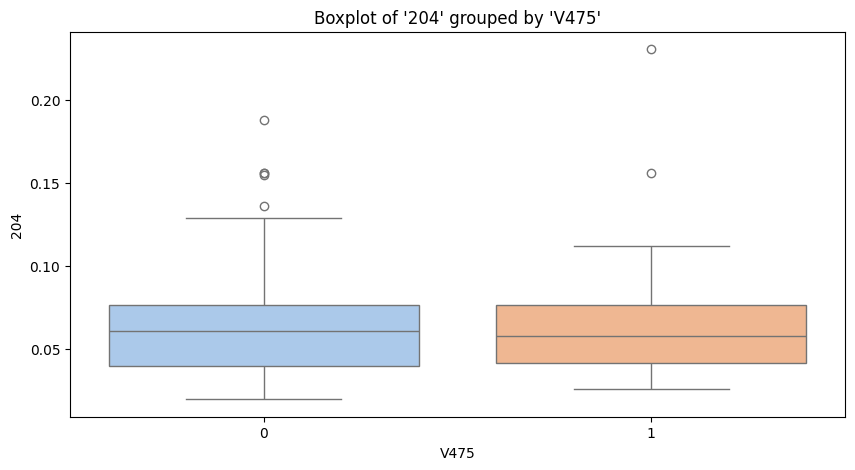

 Conditional Univariate Analysis for '15' by 'V475'
------------------------------------------------------------
 Detected Type: Numerical

 Descriptive statistics for '15' by 'V475':

       count      mean       std     min      25%      50%      75%       max
V475                                                                         
0     1460.0  9.906092  2.483535  4.4696  9.56510  9.84715  10.1230  102.8677
1      104.0  9.928818  0.564531  8.0711  9.62965  9.90860  10.1964   12.1998


C:\Users\user\AppData\Local\Temp\ipykernel_8636\3245232671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")


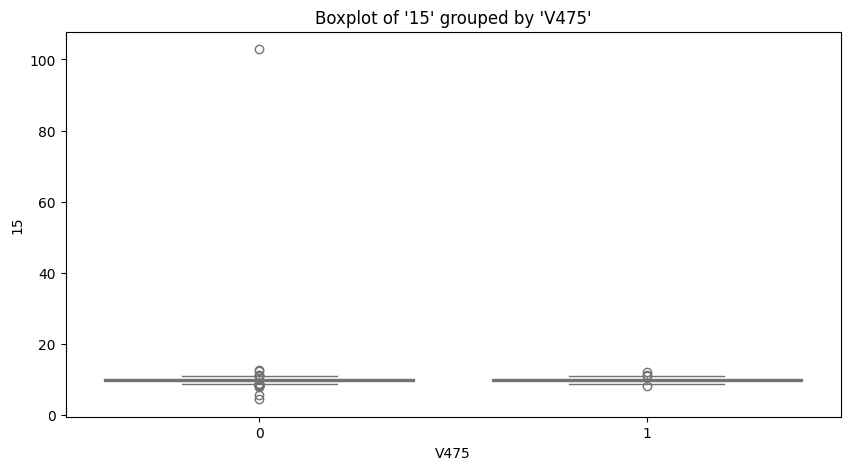

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

class ConditionalUnivariateAnalyzer:
    def __init__(self, data, label_col):
        self.data = data
        self.label_col = label_col

    def detect_type(self, col):
        if self.data[col].dtype == 'object' or self.data[col].nunique() < 15:
            return 'categorical'
        else:
            return 'numerical'
            
    def boxplot_by_label(self, col):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=self.label_col, y=col, data=self.data, palette="pastel")
        plt.title(f"Boxplot of '{col}' grouped by '{self.label_col}'")
        plt.xlabel(self.label_col)
        plt.ylabel(col)
        plt.show()

    def countplot_by_label(self, col):
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue=self.label_col, data=self.data, palette='Set2')
        plt.title(f"Countplot of {col} by {self.label_col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    def describe_by_label(self, col):
        print(f"\n Descriptive statistics for '{col}' by '{self.label_col}':\n")
        print(self.data.groupby(self.label_col)[col].describe())

    def run_all(self, col):
        print("=" * 60)
        print(f" Conditional Univariate Analysis for '{col}' by '{self.label_col}'")
        print("-" * 60)

        if col == self.label_col:
            print(" Skipping label column itself.")
            return

        var_type = self.detect_type(col)
        print(f" Detected Type: {var_type.capitalize()}")

        self.describe_by_label(col)

        if var_type == 'categorical':
            self.countplot_by_label(col)
        else:
            self.boxplot_by_label(col)

        print("=" * 60)

# Create instance (assuming `filtered_df` is your DataFrame)
eda = ConditionalUnivariateAnalyzer(filtered_df, label_col="V475")

# Run conditional EDA for all columns
for column in filtered_df.columns:
    eda.run_all(column)


In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = filtered_df.iloc[:, 1:]
y = filtered_df["V475"]

# K-Fold Cross Validation
k = 10  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")

average_accuracy = np.mean(scores) 
print(f"Average Accuracy: {average_accuracy:.2f}")

Accuracy for each fold: [0.94904459 0.89171975 0.95541401 0.93630573 0.91719745 0.92993631
 0.92993631 0.95512821 0.94871795 0.90384615]
Average Accuracy: 0.93


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [15]:
X = filtered_df.iloc[:, 1:]
y = filtered_df["V475"]

In [16]:
from sklearn.impute import SimpleImputer

# Example: Fill NaN with the mean of each column
imputer = SimpleImputer(strategy="mean")  # or "median", "most_frequent", etc.
X_imputed = imputer.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)

In [19]:
krr.fit(X_train, y_train)

KernelRidge(alpha=1.0, gamma=0.1, kernel='rbf')

In [20]:
y_pred = krr.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07150709861275231


In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# K-Fold Cross Validation
k = 10  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X_imputed , y, cv=kf, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")

average_accuracy = np.mean(scores) 
print(f"Average Accuracy: {average_accuracy:.2f}") 

Accuracy for each fold: [0.94267516 0.89808917 0.95541401 0.93630573 0.91719745 0.92993631
 0.92993631 0.95512821 0.94871795 0.8974359 ]
Average Accuracy: 0.93


Accuracy: 0.92


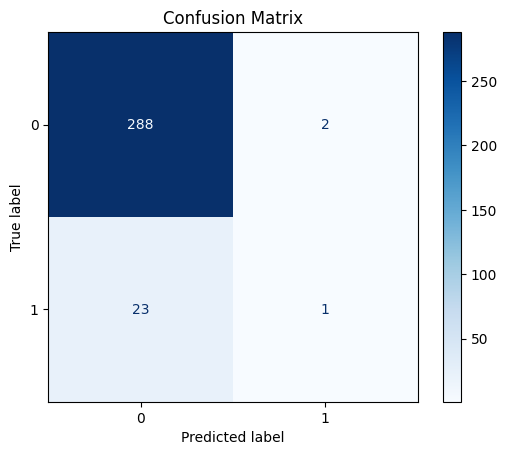

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay ,accuracy_score

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train) 

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}') 

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

# For example, if class 1 is the minority, and want it to be 30% of the dataset
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)


Accuracy: 0.91


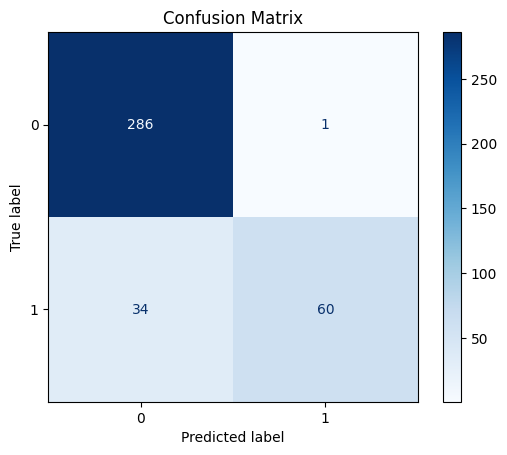

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model.fit(X_train1, y_train1) 

# Make predictions on the test data
y_pred1 = model.predict(X_test1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test1, y_pred1)

# Calculate accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy1:.2f}')   

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()